# 1. Loading Data and Early Explorations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from helpers import feature_importance, pearson_correlation, plot_data, trendline, transform_2D, seed_everything, set_axis_style
from calculate import ml_predict, val_score

In [2]:
# Seed all parameters to ensure repeatability
seed_everything()

In [3]:
# Read in our data file
df = pd.read_csv('CO Hydrogenation Training.csv')

In [4]:
df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_CHO - Gco
0,O,O,1.0,1.0,0.0,0.0,8.0,8.00,3.44,3.44,...,27.24,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,0.17026
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.50,3.44,2.82,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.29583
2,O,Cl,1.0,1.0,0.0,0.0,8.0,17.00,3.44,3.16,...,26.59,6.43,10.89,0.66,176.69,2.67,156.25,42.25,176.76,0.30107
3,OH,O,2.0,1.0,1.0,0.0,4.5,8.00,2.82,3.44,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.29583
4,OH,OH,2.0,2.0,1.0,1.0,4.5,4.50,2.82,2.82,...,26.04,1.23,7.95,0.23,185.18,1.85,20.25,49.00,169.52,0.48339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Cl,Br,1.0,1.0,0.0,0.0,17.0,35.00,3.16,2.96,...,24.78,12.16,9.36,1.13,153.52,3.24,676.00,49.00,153.51,0.27497
60,Br,CH,1.0,2.0,0.0,1.0,35.0,3.50,2.96,2.38,...,22.45,4.78,7.12,0.71,146.93,2.72,370.56,36.00,126.00,0.11547
61,Br,CH2,1.0,3.0,0.0,2.0,35.0,2.67,2.96,2.32,...,22.21,4.59,6.96,0.64,151.69,2.59,354.69,42.25,123.32,0.16181
62,Br,SH,1.0,2.0,0.0,1.0,35.0,8.50,2.96,2.39,...,22.23,5.71,7.16,0.83,141.53,2.81,473.06,49.00,123.54,0.26969


In [5]:
df.shape

(64, 55)

In [6]:
adsorbates = df[['Adsorbate 1', 'Adsorbate 2']]

In [7]:
adsorbates

,Adsorbate 1,Adsorbate 2
0,O,O
1,O,OH
2,O,Cl
3,OH,O
4,OH,OH
...,...,...
59,Cl,Br
60,Br,CH
61,Br,CH2
62,Br,SH


In [8]:
# Drop adsorbates 1 and 2 from our feature space as they will not participate in training
df = df.drop(columns = ['Adsorbate 1', 'Adsorbate 2'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 53 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num of NM atoms 1                              64 non-null     float64
 1   num of NM atoms 2                              64 non-null     float64
 2   num of H 1                                     64 non-null     float64
 3   num of H 2                                     64 non-null     float64
 4   Atomic num 1                                   64 non-null     float64
 5   Atomic num 2                                   64 non-null     float64
 6   PE 1                                           64 non-null     float64
 7   PE 2                                           64 non-null     float64
 8   Covalent Radius 1                              64 non-null     float64
 9   Covalent Radius 2                              64 non-nu

<b> No missing data observed in training dataset </b>

In [10]:
df.describe()

,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,Covalent Radius 1,Covalent Radius 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_CHO - Gco
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,1.937500,1.937500,0.937500,0.937500,8.429844,8.429844,2.735937,2.735937,0.650625,0.650625,...,23.905000,2.784531,7.579375,0.445156,172.609844,2.266875,102.550469,41.71875,144.570000,0.194665
std,0.973865,0.973865,0.973865,0.973865,8.020709,8.020709,0.478578,0.478578,0.211884,0.211884,...,2.634792,2.624086,1.805659,0.213653,28.835132,0.360079,151.817110,8.77242,32.550804,0.098376
min,1.000000,1.000000,0.000000,0.000000,2.250000,2.250000,2.290000,2.290000,0.420000,0.420000,...,20.200000,0.160000,5.390000,0.200000,124.760000,1.750000,9.770000,20.25000,102.010000,-0.012410
25%,1.000000,1.000000,0.000000,0.000000,3.500000,3.500000,2.380000,2.380000,0.480000,0.480000,...,21.862500,0.962500,6.225000,0.290000,153.062500,2.000000,20.250000,36.00000,119.515000,0.124317
50%,2.000000,2.000000,1.000000,1.000000,6.000000,6.000000,2.565000,2.565000,0.595000,0.595000,...,23.530000,1.630000,7.030000,0.360000,163.785000,2.180000,39.060000,42.25000,138.415000,0.189260
75%,2.250000,2.250000,1.250000,1.250000,8.625000,8.625000,2.960000,2.960000,0.710000,0.710000,...,25.852500,4.800000,9.360000,0.560000,186.147500,2.567500,93.952500,49.00000,167.090000,0.269690
max,4.000000,4.000000,3.000000,3.000000,35.000000,35.000000,3.980000,3.980000,1.140000,1.140000,...,30.440000,12.160000,11.830000,1.130000,240.720000,3.240000,676.000000,56.25000,231.650000,0.483390


# 2. Normalizing and Creating Dummy Variables

In [11]:
# print the features names for ease of use later
df.columns

Index(['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Atomic num 1', 'Atomic num 2', 'PE 1', 'PE 2', 'Covalent Radius 1',
       'Covalent Radius 2', 'FIE 1', 'FIE 2', 'IE 1', 'IE 2', 'EA 1', 'EA 2',
       'VdW Radius 1', 'VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H',
       'Average Atomic num', 'Average PE', 'Average Covalent Radius',
       'Average FIE', 'Average IE', 'Average EA', 'Average VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'VdW Radius 1 add VdW Radius 2',
       'FIE 1 minus FIE 2', 'FIE 1 add FIE 2', 'EA 1 minus EA 2',
       'EA 1 add EA 2', 'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Average EA of A

In [12]:
from sklearn.preprocessing import MinMaxScaler

# instantiate scaler method
scaler = MinMaxScaler()

# identify all numerical features to be normalized
numerical = ['num of NM atoms 1', 'num of NM atoms 2', 'num of H 1', 'num of H 2',
       'Average Atomic num 1', 'Average Atomic num 2', 'Average PE 1',
       'Average PE 2', 'Average Covalent Radius 1',
       'Average Covalent Radius 2', 'Average FIE 1', 'Average FIE 2', 'IE 1',
       'IE 2', 'Average EA 1', 'Average EA 2', 'Average VdW Radius 1',
       'Average VdW Radius 2', 'num of Valence Electron 1',
       'num of Valence Electron 2', 'num of Atoms', 'num of H', 'Atomic num',
       'PE', 'Covalent Radius', 'FIE', 'IE', 'EA', 'VdW Radius',
       'Average num of Valence Electron', 'PE 1 minus PE 2', 'PE 1 add PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'Covalent Radius 1 add Covalent Radius 2',
       'VdW Radius 1 minus Avg VdW Radius 2',
       'VdW Radius 1 add Avg VdW Radius 2', 'FIE 1 minus FIE 2',
       'FIE 1 add FIE 2', 'EA 1 minus EA 2', 'EA 1 add EA 2',
       'num of Valence 1 minus num of Valence 2',
       'num of Valence 1 add num of Valence 2', 'IE 1 minus IE 2',
       'IE 1 add IE 2', 'Averaged EA of Adsorbates squared',
       'Averaged PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Averaged FIE of Adsorbates squared', 'Averaged VdW Radius squared',
       'Averaged Atomic num of Adsorbates squared',
       'Averaged num of Valence Electron squared', 'Averaged IE squared']

In [13]:
# scale the features
#df[numerical] = scaler.fit_transform(df[numerical])

In [14]:
#categorical = pd.get_dummies(df[['Adsorbate 1', 'Adsorbate 2']])
#final_df = pd.merge(categorical, df, how='right', left_index=True, right_index=True)
#final_df = final_df.drop(columns=['Adsorbate 1', 'Adsorbate 2'])

In [15]:
final_df = df

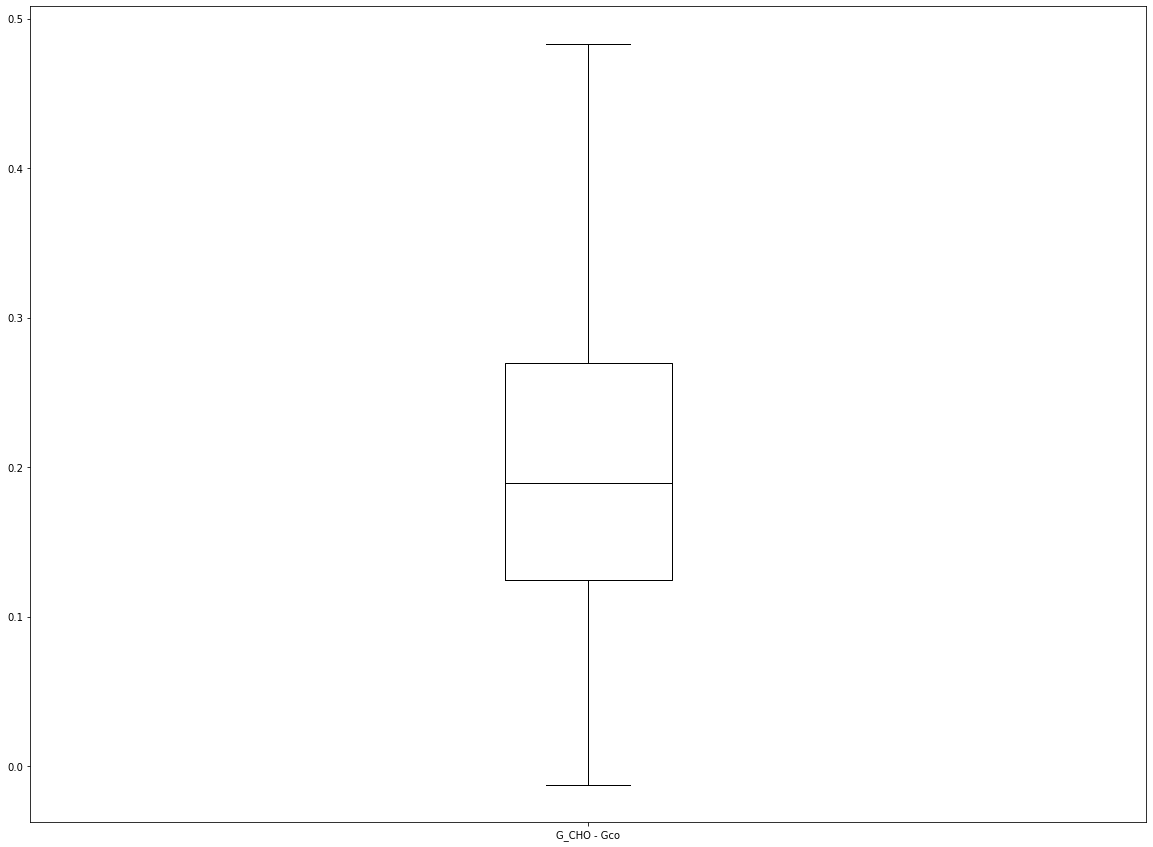

In [16]:
final_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='G_CHO - Gco', grid=False, figsize=(20, 15));

# 3. Machine Learning

## Round 1

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Instantiate regressor algorithms
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = XGBRegressor(random_state=42)
light = LGBMRegressor(random_state=42)

regressors = [GBR, KNR, RFR, SR, ridge, xgbr, light]

In [18]:
# Create an empty df to save the results of each regressor for each round of feature removal
results_df = pd.DataFrame(columns = ['Gradient Boosting Regressor', 'K-Nearest Regressor', 'Random Forest Regressor', 'Support Vector Regressor', 
                                     'Ridge Regressor', 'X-Gradient Boosting Regressor', 'LightGBM Regressor'])

In [19]:
start = time.time()
val_score(final_df, 1, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 41 seconds


In [20]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0333]","[0.0835, 0.0995]","[0.0387, 0.053]","[0.084, 0.0985]","[0.0683, 0.0858]","[0.0276, 0.0436]","[0.057, 0.0752]"


### Feature Importance

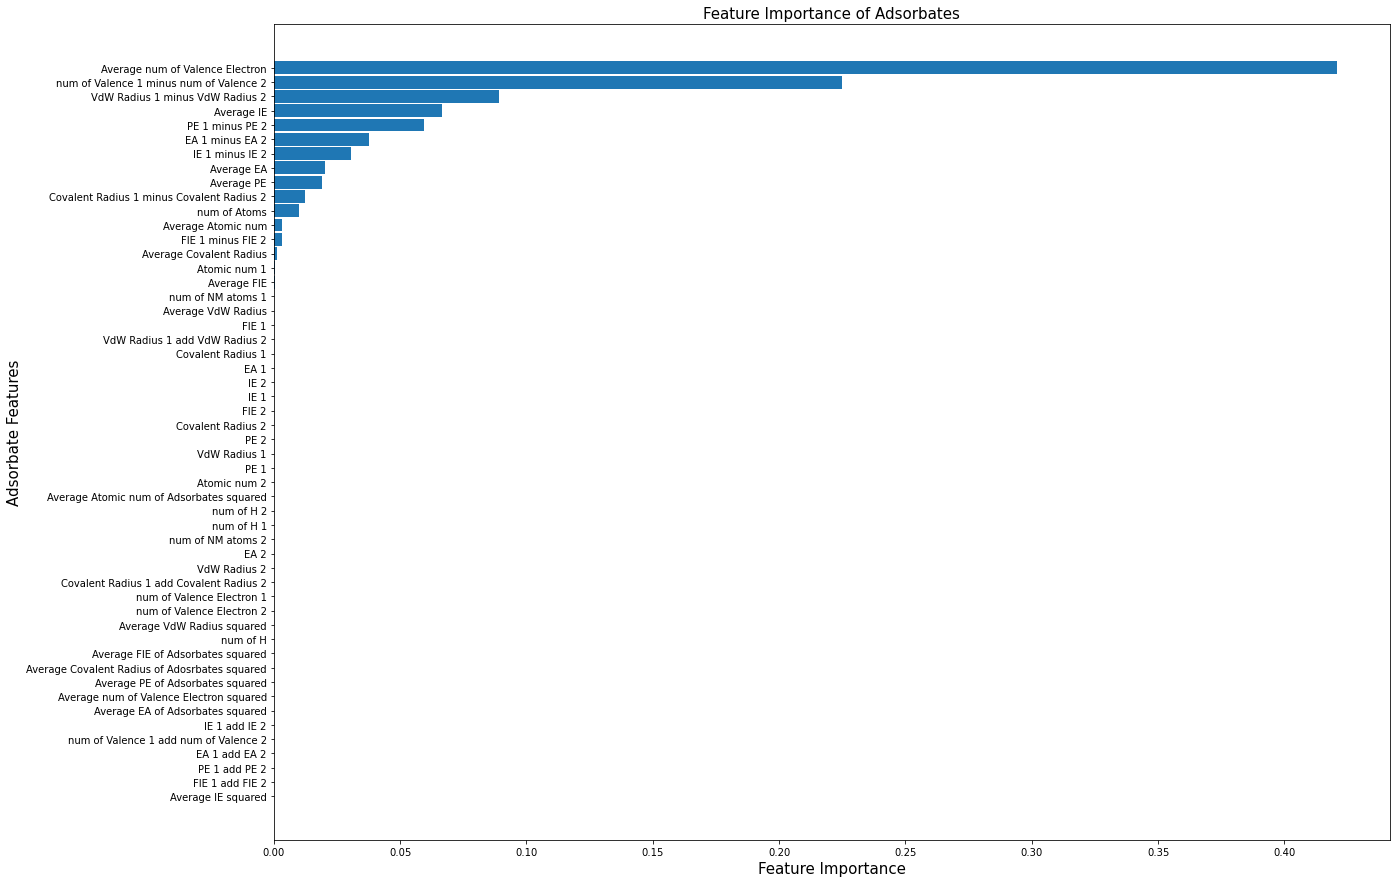

In [21]:
feature_importance(XGBRegressor(), final_df)

### Pearson's Correlation

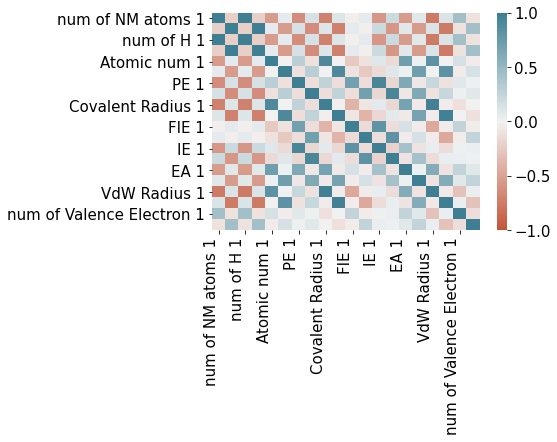

In [22]:
pearson_correlation(final_df)

## Round 2

In [23]:
# make a copy of the df from the previoud edition
df_v2 = final_df.copy()

In [24]:
# Drop the features
df_v2 = df_v2.drop(columns = ['PE 1 add PE 2',
       'Covalent Radius 1 add Covalent Radius 2','VdW Radius 1 add VdW Radius 2',
       'FIE 1 add FIE 2', 'EA 1 add EA 2',
       'num of Valence 1 add num of Valence 2',
       'IE 1 add IE 2'])

In [25]:
start = time.time()
val_score(df_v2, 2, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 40 seconds


In [26]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0333]","[0.0835, 0.0995]","[0.0387, 0.053]","[0.084, 0.0985]","[0.0683, 0.0858]","[0.0276, 0.0436]","[0.057, 0.0752]"
2,"[0.0226, 0.0352]","[0.0835, 0.0995]","[0.0389, 0.0535]","[0.0841, 0.0985]","[0.0687, 0.0862]","[0.0279, 0.0441]","[0.057, 0.0752]"


### Feature Importance and Correlation (Round 2)

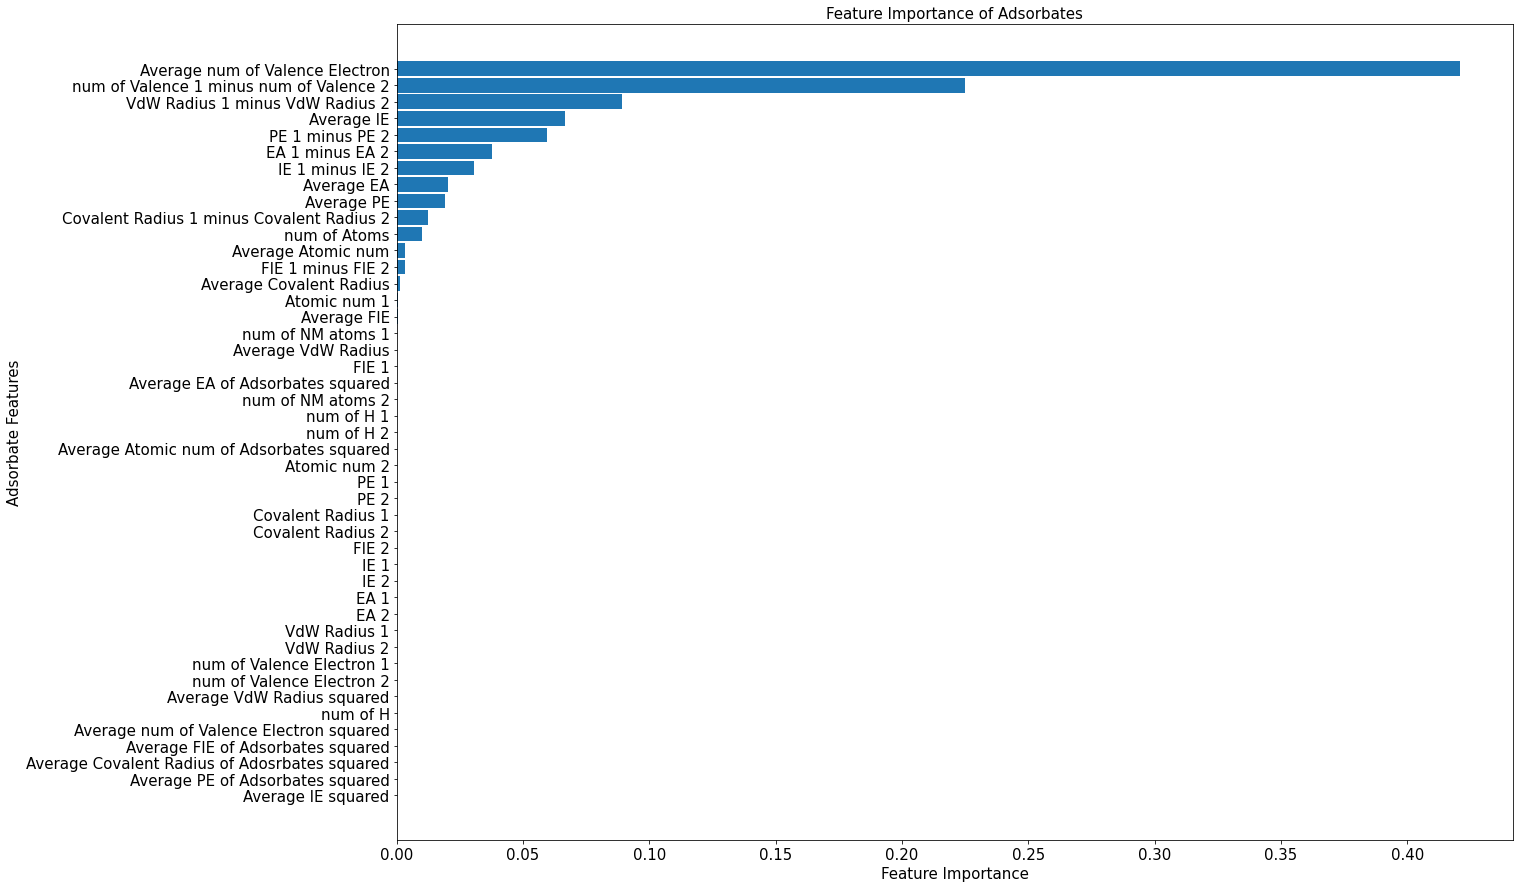

In [27]:
feature_importance(XGBRegressor(), df_v2)

## Round 3

In [28]:
df_v3 = df_v2.copy()

### Justification for dropping features

low importance single features were removed in this iteration of adjustments.

- 12 features (6 pairs) of adsorbate features were removed

In [29]:
df_v3 = df_v3.drop(columns = ['Average EA of Adsorbates squared', 'Average PE of Adsorbates squared',
       'Average Covalent Radius of Adosrbates squared',
       'Average FIE of Adsorbates squared',
       'Average Atomic num of Adsorbates squared',
       'Average num of Valence Electron squared', 'Average IE squared'])

In [30]:
start = time.time()
val_score(df_v3, 3, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 38 seconds


In [31]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0333]","[0.0835, 0.0995]","[0.0387, 0.053]","[0.084, 0.0985]","[0.0683, 0.0858]","[0.0276, 0.0436]","[0.057, 0.0752]"
2,"[0.0226, 0.0352]","[0.0835, 0.0995]","[0.0389, 0.0535]","[0.0841, 0.0985]","[0.0687, 0.0862]","[0.0279, 0.0441]","[0.057, 0.0752]"
3,"[0.0229, 0.0354]","[0.0837, 0.0989]","[0.0396, 0.0544]","[0.0781, 0.0946]","[0.0628, 0.0799]","[0.0279, 0.0442]","[0.057, 0.0753]"


### Feature Importance and Correlation (Round 3)

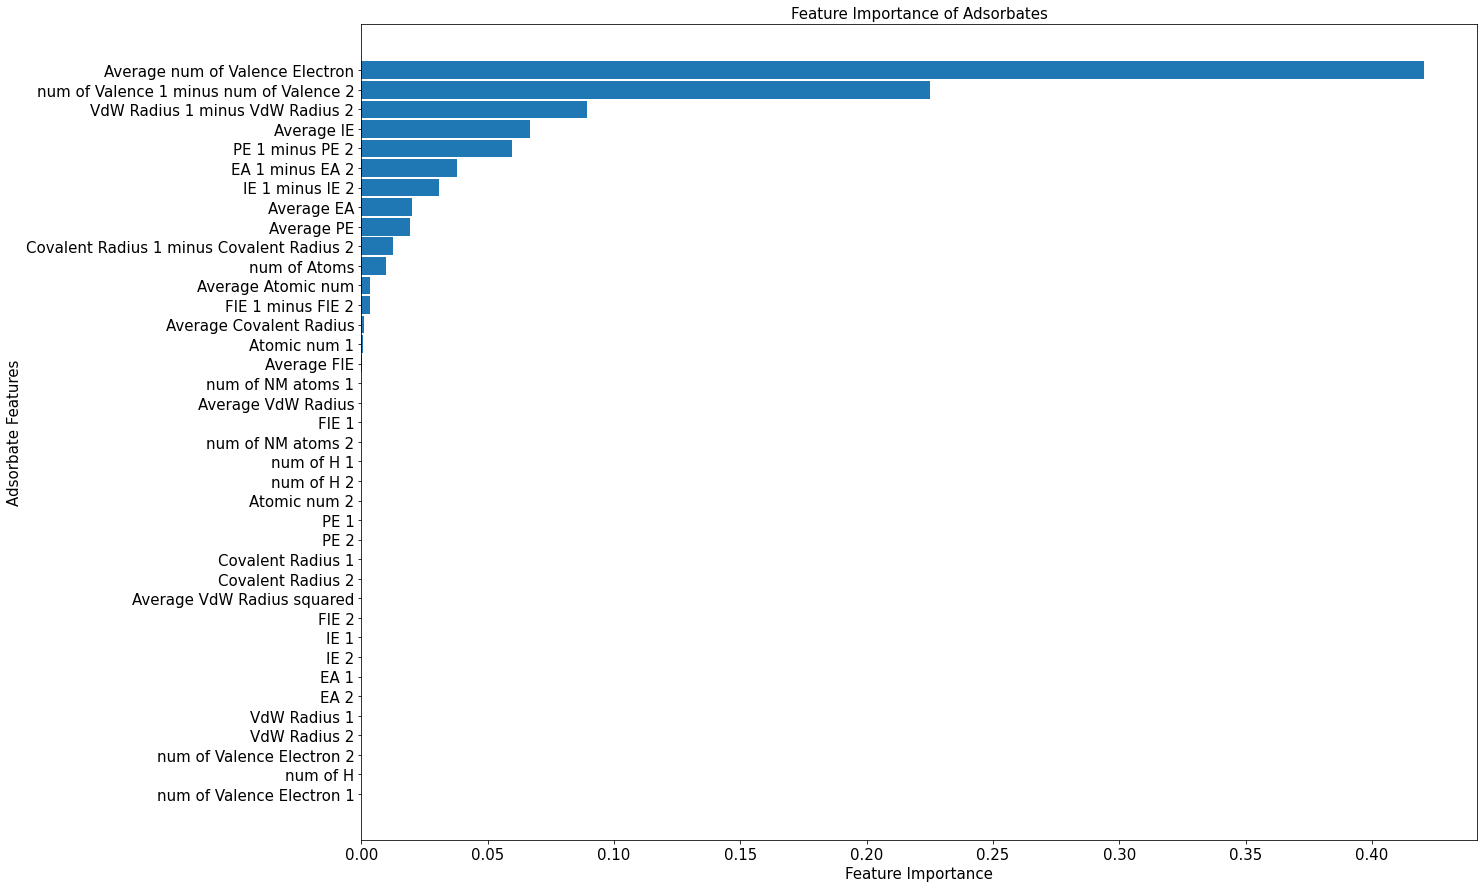

In [32]:
feature_importance(XGBRegressor(), df_v3)

## Round 4

In [33]:
df_v4 = df_v3.copy()

In [34]:
df_v4 = df_v4.drop(columns = ['num of H 1', 'num of H 2', 'num of H', 'FIE 1',
       'FIE 2', 'IE 1', 'IE 2'])

In [35]:
start = time.time()
val_score(df_v4, 4, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 36 seconds


In [36]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0333]","[0.0835, 0.0995]","[0.0387, 0.053]","[0.084, 0.0985]","[0.0683, 0.0858]","[0.0276, 0.0436]","[0.057, 0.0752]"
2,"[0.0226, 0.0352]","[0.0835, 0.0995]","[0.0389, 0.0535]","[0.0841, 0.0985]","[0.0687, 0.0862]","[0.0279, 0.0441]","[0.057, 0.0752]"
3,"[0.0229, 0.0354]","[0.0837, 0.0989]","[0.0396, 0.0544]","[0.0781, 0.0946]","[0.0628, 0.0799]","[0.0279, 0.0442]","[0.057, 0.0753]"
4,"[0.0216, 0.0345]","[0.0847, 0.1012]","[0.0381, 0.053]","[0.0757, 0.0919]","[0.0607, 0.0776]","[0.0275, 0.0439]","[0.0573, 0.0758]"


### Feature Importance and Correlation (Round 4)

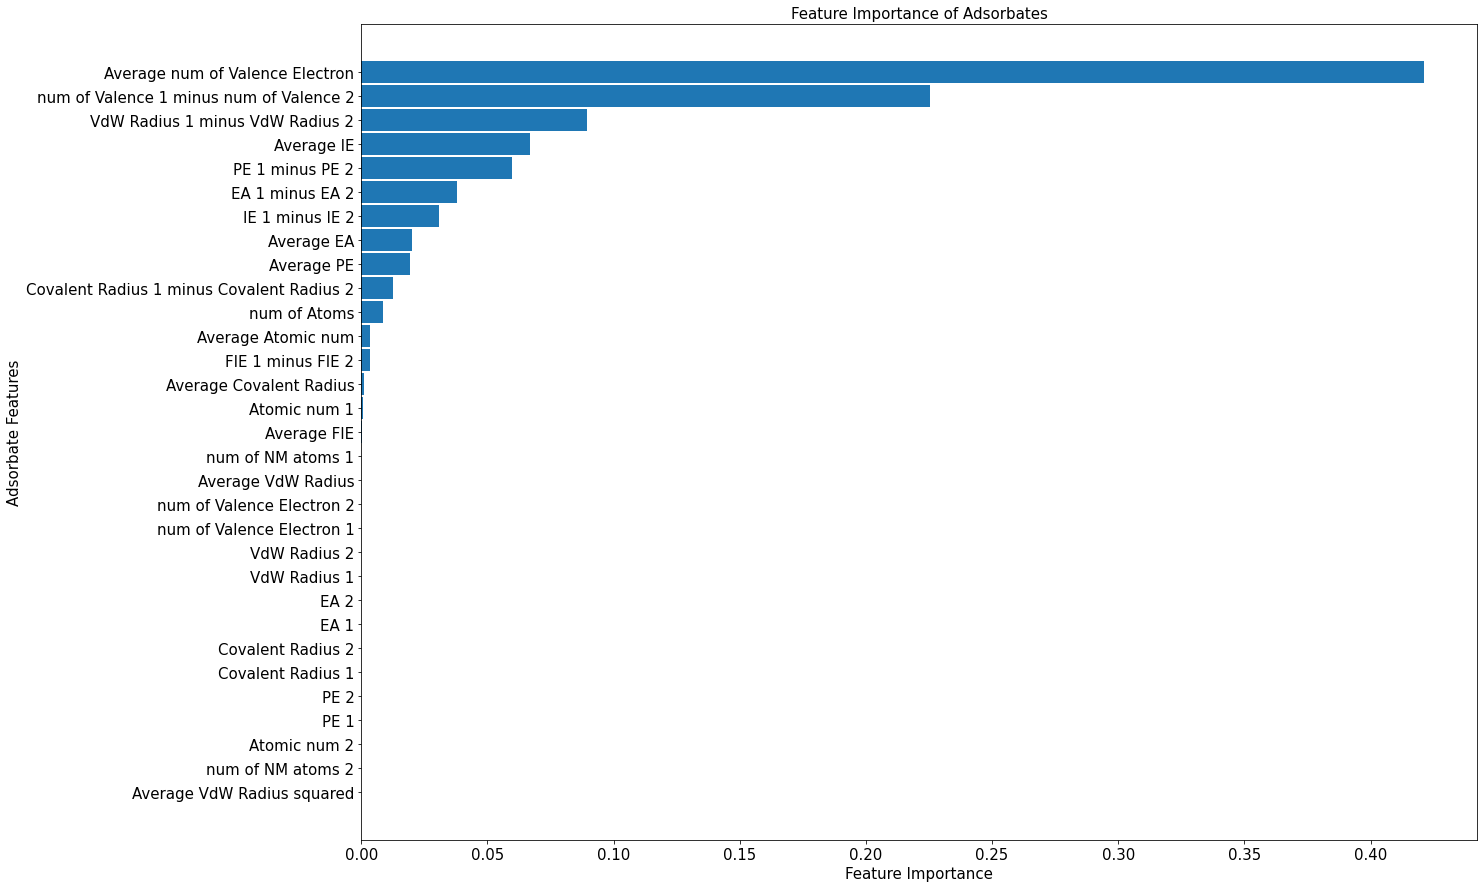

In [37]:
feature_importance(XGBRegressor(), df_v4)

## Round 5

In [38]:
df_v5 = df_v4.copy()

In [39]:
df_v5 = df_v5.drop(columns = ['num of NM atoms 1', 'num of NM atoms 2', 'EA 1', 'EA 2', 'Atomic num 1',
       'Atomic num 2', 'PE 1', 'PE 2', 'VdW Radius 1',
       'VdW Radius 2', 'Covalent Radius 1', 'Covalent Radius 2', 
       'num of Valence Electron 1', 'num of Valence Electron 2', 'Average VdW Radius squared', 'Average VdW Radius',
       'Average FIE'])

In [40]:
start = time.time()
val_score(df_v5, 5, regressors, results_df)
end = time.time()

print('Time taken to run this iteration was {} seconds'.format(int(end - start)))


Time taken to run this iteration was 31 seconds


In [41]:
results_df

,Gradient Boosting Regressor,K-Nearest Regressor,Random Forest Regressor,Support Vector Regressor,Ridge Regressor,X-Gradient Boosting Regressor,LightGBM Regressor
1,"[0.0215, 0.0333]","[0.0835, 0.0995]","[0.0387, 0.053]","[0.084, 0.0985]","[0.0683, 0.0858]","[0.0276, 0.0436]","[0.057, 0.0752]"
2,"[0.0226, 0.0352]","[0.0835, 0.0995]","[0.0389, 0.0535]","[0.0841, 0.0985]","[0.0687, 0.0862]","[0.0279, 0.0441]","[0.057, 0.0752]"
3,"[0.0229, 0.0354]","[0.0837, 0.0989]","[0.0396, 0.0544]","[0.0781, 0.0946]","[0.0628, 0.0799]","[0.0279, 0.0442]","[0.057, 0.0753]"
4,"[0.0216, 0.0345]","[0.0847, 0.1012]","[0.0381, 0.053]","[0.0757, 0.0919]","[0.0607, 0.0776]","[0.0275, 0.0439]","[0.0573, 0.0758]"
5,"[0.0139, 0.0253]","[0.0871, 0.1003]","[0.0309, 0.0438]","[0.0708, 0.0866]","[0.0544, 0.071]","[0.0139, 0.0275]","[0.056, 0.0749]"


### Feature Importance and Correlation (Round 5)

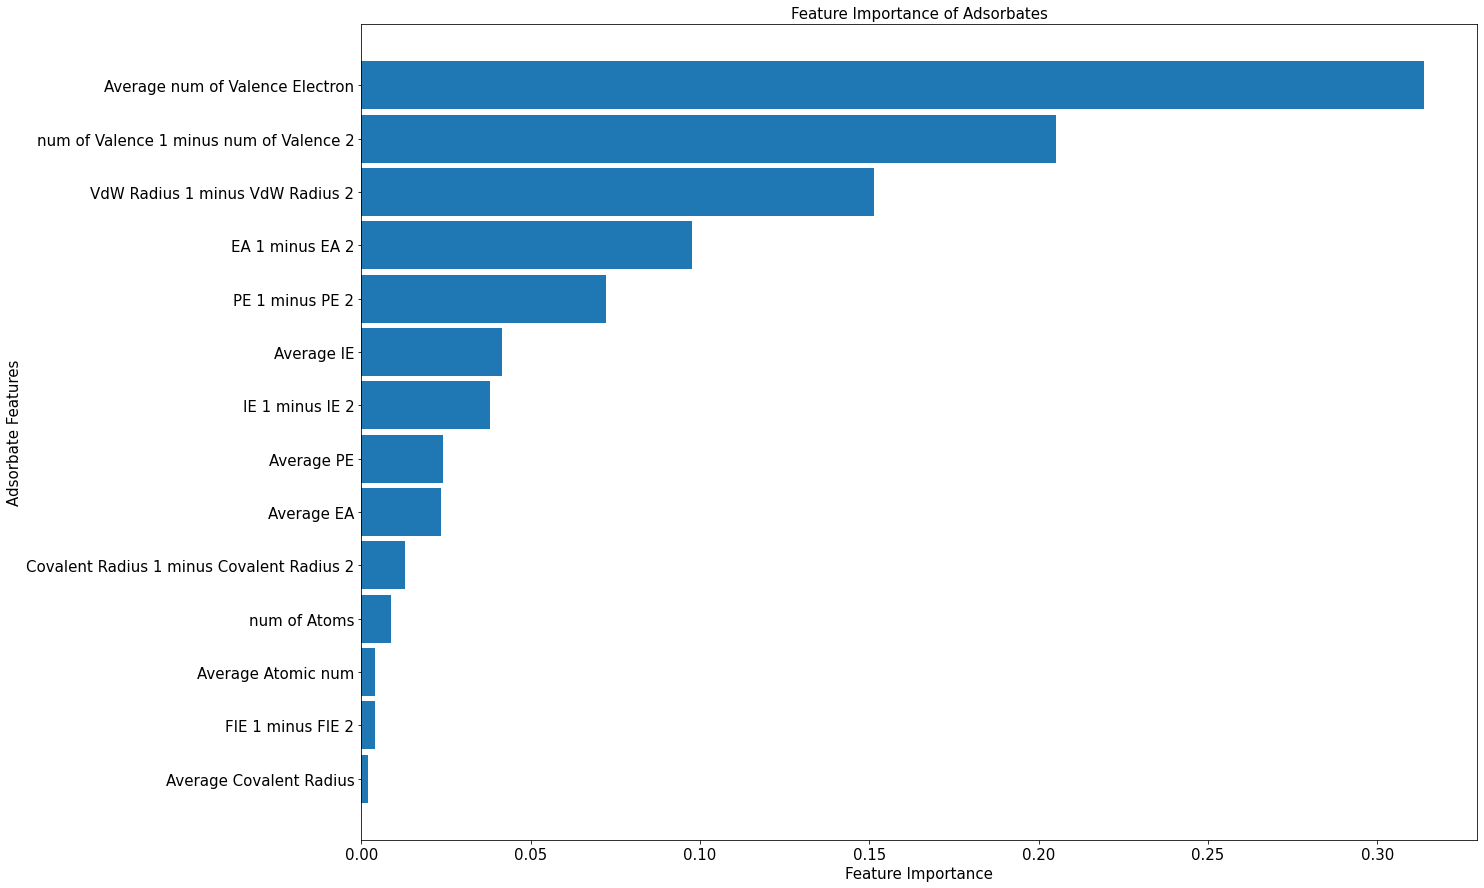

In [42]:
feature_importance(XGBRegressor(), df_v5)

### Pearson's Correlation (Round 5)

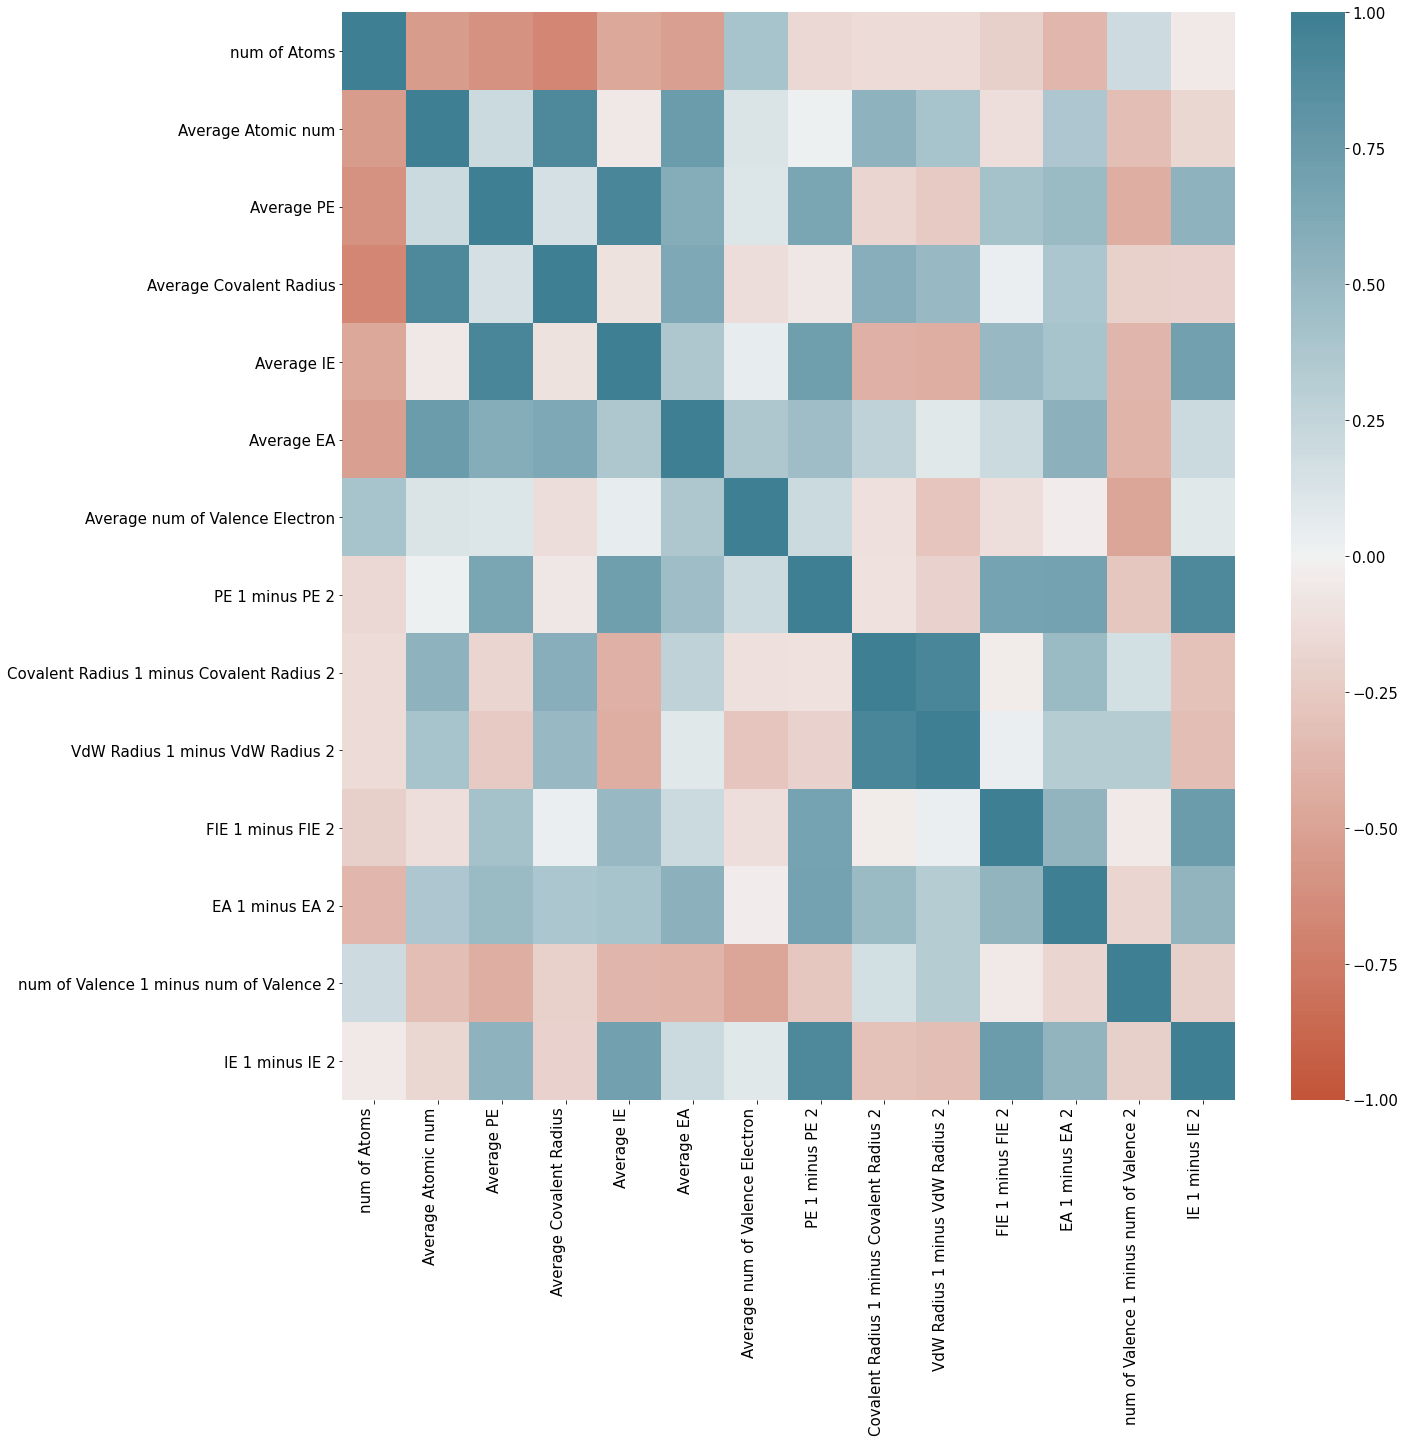

In [43]:
pearson_correlation(df_v5, last=True)

# 4. Hyperparameter Tuning

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
import xgboost
import lightgbm

In [45]:
GBR = GradientBoostingRegressor(random_state=42)
KNR = KNeighborsRegressor()
RFR = RandomForestRegressor(random_state=42)
SR = SVR()
ridge = Ridge(random_state=42)
xgbr = xgboost.XGBRegressor(random_state=42)
light = lightgbm.LGBMRegressor(random_state=42)

In [46]:
features = df_v5.iloc[:, 0:-1]
target = df_v5.iloc[:, -1]

In [47]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold


# Defining XGBR hyperparameters
xgbr_grid = {
    
    'min_child_weight': [1, 5, 10],
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.3, 1, 2],
    'colsample_bytree': [0.1, 0.5, 0.8],
    'colsample_bylevel': [0.1, 0.5, 0.8],

}


fold = RepeatedKFold(n_splits = 10, n_repeats = 1, random_state = 42)

In [48]:
# Performing Randomized CV search on XGBR
xgbr_grid_cv = GridSearchCV(estimator = xgbr, cv = fold,
            param_grid = xgbr_grid, n_jobs = -1, scoring='neg_root_mean_squared_error',
            verbose = 5, return_train_score = True, refit = True)

In [49]:
xgbr_grid_cv.fit(features, target)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 2146 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 3010 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 3496 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 4576 tasks      | e

GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=42),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=n...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.1, 0.5, 0.8],
                         'colsampl

In [50]:
xgbr_grid_cv.best_params_

{'colsample_bylevel': 0.5,
 'colsample_bytree': 0.8,
 'learning_rate': 1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 100}

In [51]:
xgbr_grid_cv.best_score_

-0.010558720689242237

In [52]:
xgbr_grid_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1, max_delta_step=0, max_depth=4, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=16, num_parallel_tree=1, random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [53]:
from sklearn.model_selection import cross_val_score

xgbr_optimized = xgbr_grid_cv.best_estimator_

rmse_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_root_mean_squared_error')
mae_score = cross_val_score(xgbr_optimized, features, target, cv = fold, scoring='neg_mean_absolute_error')

In [54]:
optimized_xgbr_rmse = np.abs(rmse_score).mean()
optimized_xgbr_mae = np.abs(mae_score).mean()

In [55]:
optimized_xgbr_rmse, optimized_xgbr_mae

(0.010558720689242237, 0.004758435734507583)

# 5. Different Separation Ratios

In [56]:
from tqdm.auto import tqdm

separations = [2,3,4,5,6,7,8,9,10]

mae_results = []
rmse_results = []
r2_results = []

for split in tqdm(separations):
    fold = RepeatedKFold(n_splits=split, n_repeats=10, random_state=42)
    mae = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_mean_absolute_error')
    rmse = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='neg_root_mean_squared_error')
    r2 = cross_val_score(xgbr_optimized, features, target, cv=fold, scoring='r2')
    mae_results.append(np.abs(mae).mean())
    rmse_results.append(np.abs(rmse).mean())
    r2_results.append(np.abs(r2).mean())

In [57]:
r2_results

[0.47436550776396685,
 0.5164143929948383,
 0.6684750605690345,
 0.7126603505628397,
 0.7590538294842222,
 0.8468361900178641,
 0.8423756335870568,
 0.8768183840066673,
 0.8978217378149053]

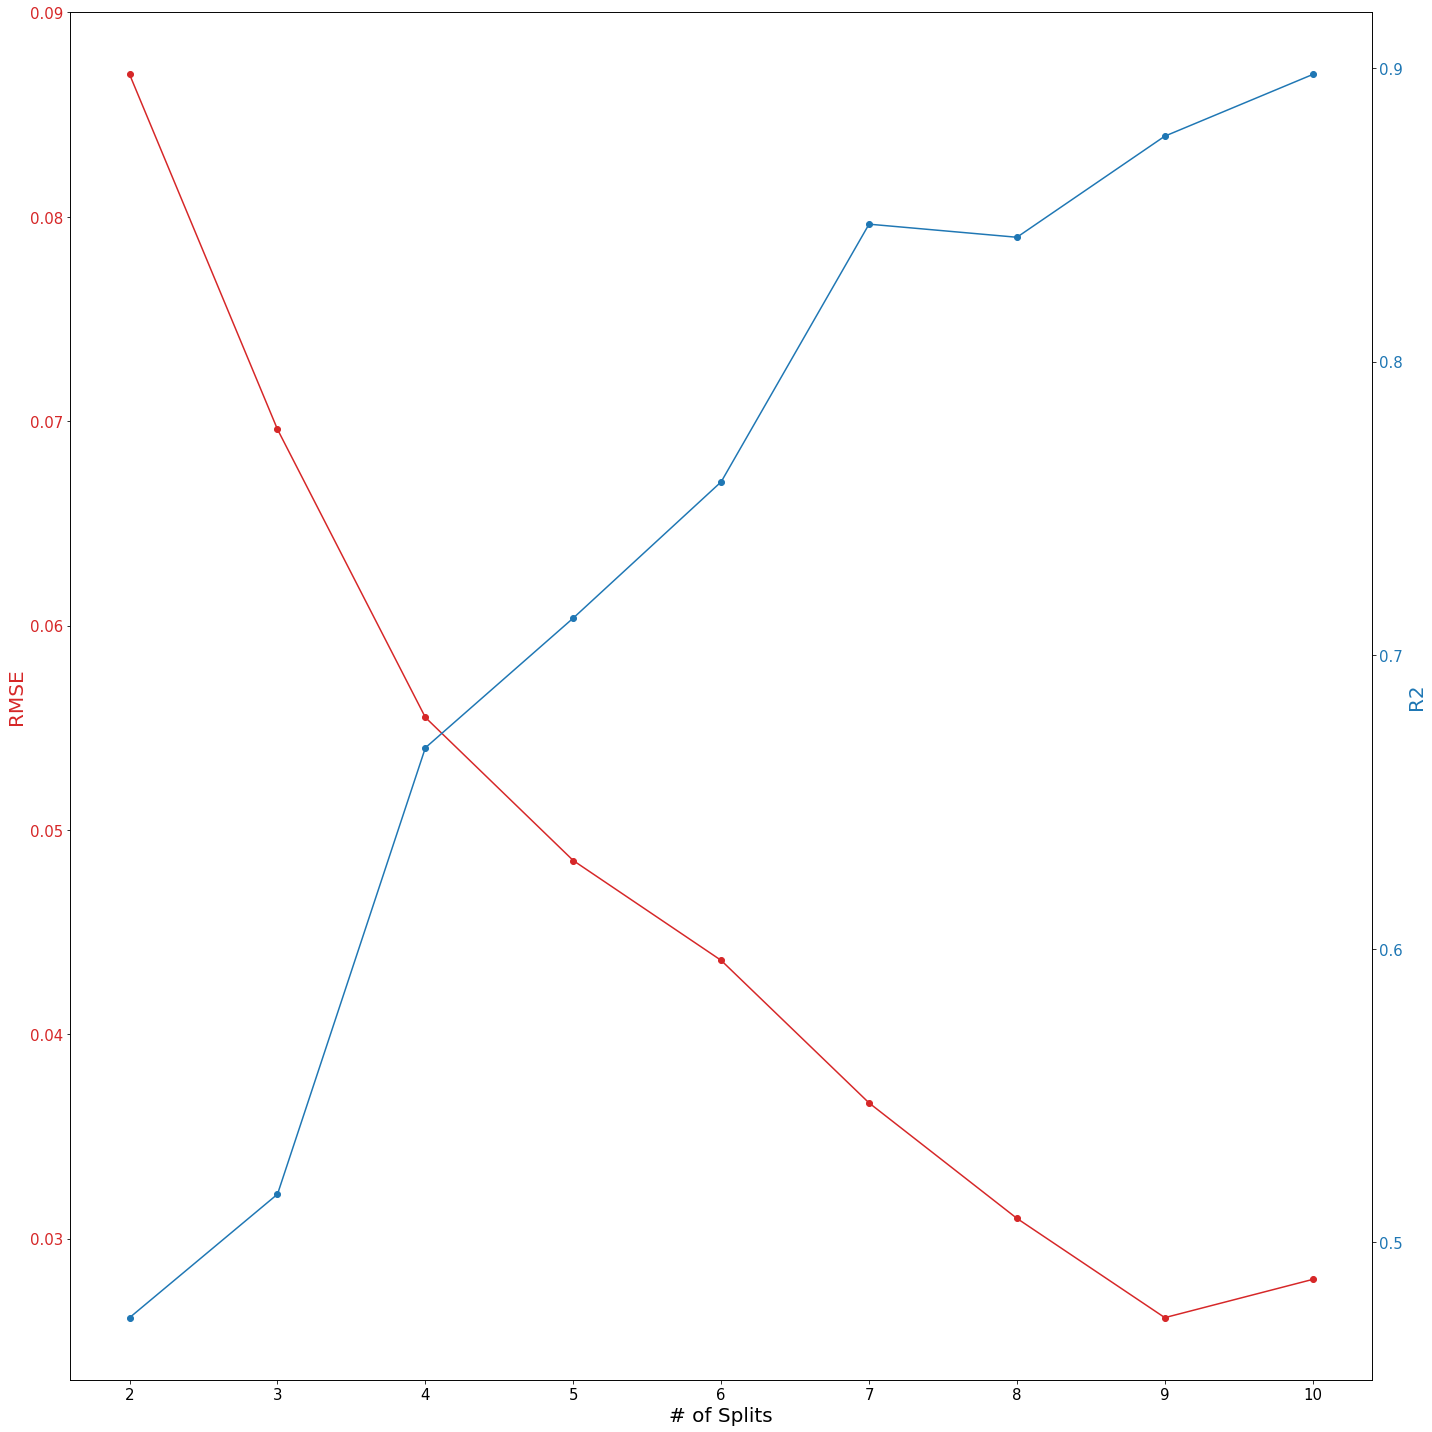

In [58]:
t = separations
data1 = rmse_results
data2 = r2_results

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('# of Splits', size = 20)
ax1.set_ylabel('RMSE', color=color, size = 20)
ax1.plot(t, data1, color=color, marker = 'o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2', color=color, size = 20)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color, marker = 'o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [59]:
from nn import train_model_rmse, train_model_mae, load_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.9, random_state = 42)

In [60]:
start = time.time()
model_history_rmse = train_model_rmse(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - 1s 1s/step - loss: 0.2405 - val_loss: 0.1234

Epoch 00001: val_loss improved from inf to 0.12339, saving model to model_best_weights.h5
Epoch 2/1600
1/1 [==============================] - 0s 27ms/step - loss: 0.2363 - val_loss: 0.1223

Epoch 00002: val_loss improved from 0.12339 to 0.12235, saving model to model_best_weights.h5
Epoch 3/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.2288 - val_loss: 0.1216

Epoch 00003: val_loss improved from 0.12235 to 0.12157, saving model to model_best_weights.h5
Epoch 4/1600
1/1 [==============================] - 0s 26ms/step - loss: 0.2249 - val_loss: 0.1209

Epoch 00004: val_loss improved from 0.12157 to 0.12087, saving model to model_best_weights.h5
Epoch 5/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.2204 - val_loss: 0.1202

Epoch 00005: val_loss improved from 0.12087 to 0.12024, saving model to model_best_weights.h5
Epoch 6/1600
1/1 [==================

1/1 [==============================] - 0s 24ms/step - loss: 0.1778 - val_loss: 0.1071

Epoch 00044: val_loss did not improve from 0.10141
Epoch 45/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.1790 - val_loss: 0.1081

Epoch 00045: val_loss did not improve from 0.10141
Epoch 46/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.1753 - val_loss: 0.1144

Epoch 00046: val_loss did not improve from 0.10141
Epoch 47/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.1739 - val_loss: 0.1180

Epoch 00047: val_loss did not improve from 0.10141
Epoch 48/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.1742 - val_loss: 0.1210

Epoch 00048: val_loss did not improve from 0.10141
Epoch 49/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.1720 - val_loss: 0.1208

Epoch 00049: val_loss did not improve from 0.10141
Epoch 50/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.1763 - val_loss: 0.1241

E

1/1 [==============================] - 0s 25ms/step - loss: 0.1149 - val_loss: 0.0890

Epoch 00095: val_loss did not improve from 0.08519
Epoch 96/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.1192 - val_loss: 0.0883

Epoch 00096: val_loss did not improve from 0.08519
Epoch 97/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.1172 - val_loss: 0.0883

Epoch 00097: val_loss did not improve from 0.08519
Epoch 98/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.1116 - val_loss: 0.0863

Epoch 00098: val_loss did not improve from 0.08519
Epoch 99/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.1240 - val_loss: 0.0852

Epoch 00099: val_loss improved from 0.08519 to 0.08517, saving model to model_best_weights.h5
Epoch 100/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.1151 - val_loss: 0.0839

Epoch 00100: val_loss improved from 0.08517 to 0.08390, saving model to model_best_weights.h5
Epoch 101/1600


Epoch 144/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0770 - val_loss: 0.0629

Epoch 00144: val_loss did not improve from 0.06255
Epoch 145/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0808 - val_loss: 0.0635

Epoch 00145: val_loss did not improve from 0.06255
Epoch 146/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0787 - val_loss: 0.0652

Epoch 00146: val_loss did not improve from 0.06255
Epoch 147/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0776 - val_loss: 0.0657

Epoch 00147: val_loss did not improve from 0.06255
Epoch 148/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0787 - val_loss: 0.0661

Epoch 00148: val_loss did not improve from 0.06255
Epoch 149/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0789 - val_loss: 0.0653

Epoch 00149: val_loss did not improve from 0.06255
Epoch 150/1600
1/1 [==============================] - 0s 30ms/step - loss: 0.0698 

1/1 [==============================] - 0s 24ms/step - loss: 0.0569 - val_loss: 0.0494

Epoch 00195: val_loss did not improve from 0.04172
Epoch 196/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0757 - val_loss: 0.0496

Epoch 00196: val_loss did not improve from 0.04172
Epoch 197/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0662 - val_loss: 0.0490

Epoch 00197: val_loss did not improve from 0.04172
Epoch 198/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0725 - val_loss: 0.0482

Epoch 00198: val_loss did not improve from 0.04172
Epoch 199/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0771 - val_loss: 0.0492

Epoch 00199: val_loss did not improve from 0.04172
Epoch 200/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0756 - val_loss: 0.0513

Epoch 00200: val_loss did not improve from 0.04172
Epoch 201/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0577 - val_loss: 0.0


Epoch 00247: val_loss did not improve from 0.03935
Epoch 248/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0573 - val_loss: 0.0431

Epoch 00248: val_loss did not improve from 0.03935
Epoch 249/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0568 - val_loss: 0.0436

Epoch 00249: val_loss did not improve from 0.03935
Epoch 250/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0486 - val_loss: 0.0441

Epoch 00250: val_loss did not improve from 0.03935
Epoch 251/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0692 - val_loss: 0.0463

Epoch 00251: val_loss did not improve from 0.03935
Epoch 252/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0557 - val_loss: 0.0477

Epoch 00252: val_loss did not improve from 0.03935
Epoch 253/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0615 - val_loss: 0.0501

Epoch 00253: val_loss did not improve from 0.03935
Epoch 254/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0481 - val_loss: 0.0450

Epoch 00301: val_loss did not improve from 0.03935
Epoch 302/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0457 - val_loss: 0.0432

Epoch 00302: val_loss did not improve from 0.03935
Epoch 303/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0488 - val_loss: 0.0448

Epoch 00303: val_loss did not improve from 0.03935
Epoch 304/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0536 - val_loss: 0.0466

Epoch 00304: val_loss did not improve from 0.03935
Epoch 305/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0568 - val_loss: 0.0468

Epoch 00305: val_loss did not improve from 0.03935
Epoch 306/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0533 - val_loss: 0.0476

Epoch 00306: val_loss did not improve from 0.03935
Epoch 307/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0585 - val_loss: 0.0


Epoch 00354: val_loss did not improve from 0.03935
Epoch 355/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0568 - val_loss: 0.0467

Epoch 00355: val_loss did not improve from 0.03935
Epoch 356/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0487 - val_loss: 0.0458

Epoch 00356: val_loss did not improve from 0.03935
Epoch 357/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0487 - val_loss: 0.0470

Epoch 00357: val_loss did not improve from 0.03935
Epoch 358/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0539 - val_loss: 0.0480

Epoch 00358: val_loss did not improve from 0.03935
Epoch 359/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0543 - val_loss: 0.0457

Epoch 00359: val_loss did not improve from 0.03935
Epoch 360/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0506 - val_loss: 0.0476

Epoch 00360: val_loss did not improve from 0.03935
Epoch 361/1600
1/1 [==========

1/1 [==============================] - 0s 24ms/step - loss: 0.0487 - val_loss: 0.0515

Epoch 00408: val_loss did not improve from 0.03814
Epoch 409/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0554 - val_loss: 0.0533

Epoch 00409: val_loss did not improve from 0.03814
Epoch 410/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0567 - val_loss: 0.0555

Epoch 00410: val_loss did not improve from 0.03814
Epoch 411/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0433 - val_loss: 0.0617

Epoch 00411: val_loss did not improve from 0.03814
Epoch 412/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0450 - val_loss: 0.0618

Epoch 00412: val_loss did not improve from 0.03814
Epoch 413/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0530 - val_loss: 0.0600

Epoch 00413: val_loss did not improve from 0.03814
Epoch 414/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0575 - val_loss: 0.0

1/1 [==============================] - 0s 25ms/step - loss: 0.0709 - val_loss: 0.0402

Epoch 00461: val_loss did not improve from 0.03355
Epoch 462/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0633 - val_loss: 0.0419

Epoch 00462: val_loss did not improve from 0.03355
Epoch 463/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0496 - val_loss: 0.0443

Epoch 00463: val_loss did not improve from 0.03355
Epoch 464/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0661 - val_loss: 0.0443

Epoch 00464: val_loss did not improve from 0.03355
Epoch 465/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0684 - val_loss: 0.0435

Epoch 00465: val_loss did not improve from 0.03355
Epoch 466/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0561 - val_loss: 0.0431

Epoch 00466: val_loss did not improve from 0.03355
Epoch 467/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0607 - val_loss: 0.0

1/1 [==============================] - 0s 23ms/step - loss: 0.0480 - val_loss: 0.0494

Epoch 00514: val_loss did not improve from 0.02990
Epoch 515/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0462 - val_loss: 0.0455

Epoch 00515: val_loss did not improve from 0.02990
Epoch 516/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0506 - val_loss: 0.0479

Epoch 00516: val_loss did not improve from 0.02990
Epoch 517/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0518 - val_loss: 0.0552

Epoch 00517: val_loss did not improve from 0.02990
Epoch 518/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0409 - val_loss: 0.0540

Epoch 00518: val_loss did not improve from 0.02990
Epoch 519/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0678 - val_loss: 0.0522

Epoch 00519: val_loss did not improve from 0.02990
Epoch 520/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0513 - val_loss: 0.0


Epoch 00566: val_loss did not improve from 0.02572
Epoch 567/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0558 - val_loss: 0.0500

Epoch 00567: val_loss did not improve from 0.02572
Epoch 568/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0555 - val_loss: 0.0458

Epoch 00568: val_loss did not improve from 0.02572
Epoch 569/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0643 - val_loss: 0.0388

Epoch 00569: val_loss did not improve from 0.02572
Epoch 570/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0408 - val_loss: 0.0388

Epoch 00570: val_loss did not improve from 0.02572
Epoch 571/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0554 - val_loss: 0.0369

Epoch 00571: val_loss did not improve from 0.02572
Epoch 572/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0615 - val_loss: 0.0357

Epoch 00572: val_loss did not improve from 0.02572
Epoch 573/1600
1/1 [==========


Epoch 00619: val_loss did not improve from 0.02097
Epoch 620/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0440 - val_loss: 0.0556

Epoch 00620: val_loss did not improve from 0.02097
Epoch 621/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0586 - val_loss: 0.0493

Epoch 00621: val_loss did not improve from 0.02097
Epoch 622/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0590 - val_loss: 0.0425

Epoch 00622: val_loss did not improve from 0.02097
Epoch 623/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0743 - val_loss: 0.0354

Epoch 00623: val_loss did not improve from 0.02097
Epoch 624/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0434 - val_loss: 0.0354

Epoch 00624: val_loss did not improve from 0.02097
Epoch 625/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0576 - val_loss: 0.0396

Epoch 00625: val_loss did not improve from 0.02097
Epoch 626/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0629 - val_loss: 0.0409

Epoch 00673: val_loss did not improve from 0.02097
Epoch 674/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0535 - val_loss: 0.0419

Epoch 00674: val_loss did not improve from 0.02097
Epoch 675/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0549 - val_loss: 0.0414

Epoch 00675: val_loss did not improve from 0.02097
Epoch 676/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0443 - val_loss: 0.0399

Epoch 00676: val_loss did not improve from 0.02097
Epoch 677/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0505 - val_loss: 0.0383

Epoch 00677: val_loss did not improve from 0.02097
Epoch 678/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0468 - val_loss: 0.0404

Epoch 00678: val_loss did not improve from 0.02097
Epoch 679/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0551 - val_loss: 0.0


Epoch 00726: val_loss did not improve from 0.02097
Epoch 727/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0503 - val_loss: 0.0748

Epoch 00727: val_loss did not improve from 0.02097
Epoch 728/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0575 - val_loss: 0.0629

Epoch 00728: val_loss did not improve from 0.02097
Epoch 729/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0552 - val_loss: 0.0543

Epoch 00729: val_loss did not improve from 0.02097
Epoch 730/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0759 - val_loss: 0.0514

Epoch 00730: val_loss did not improve from 0.02097
Epoch 731/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0537 - val_loss: 0.0498

Epoch 00731: val_loss did not improve from 0.02097
Epoch 732/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0544 - val_loss: 0.0509

Epoch 00732: val_loss did not improve from 0.02097
Epoch 733/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0447 - val_loss: 0.0441

Epoch 00780: val_loss did not improve from 0.02097
Epoch 781/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0781 - val_loss: 0.0450

Epoch 00781: val_loss did not improve from 0.02097
Epoch 782/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0596 - val_loss: 0.0412

Epoch 00782: val_loss did not improve from 0.02097
Epoch 783/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0479 - val_loss: 0.0397

Epoch 00783: val_loss did not improve from 0.02097
Epoch 784/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0591 - val_loss: 0.0362

Epoch 00784: val_loss did not improve from 0.02097
Epoch 785/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0519 - val_loss: 0.0384

Epoch 00785: val_loss did not improve from 0.02097
Epoch 786/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0506 - val_loss: 0.0


Epoch 00833: val_loss did not improve from 0.02097
Epoch 834/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0558 - val_loss: 0.0427

Epoch 00834: val_loss did not improve from 0.02097
Epoch 835/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0520 - val_loss: 0.0406

Epoch 00835: val_loss did not improve from 0.02097
Epoch 836/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0480 - val_loss: 0.0422

Epoch 00836: val_loss did not improve from 0.02097
Epoch 837/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0487 - val_loss: 0.0450

Epoch 00837: val_loss did not improve from 0.02097
Epoch 838/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0751 - val_loss: 0.0454

Epoch 00838: val_loss did not improve from 0.02097
Epoch 839/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0608 - val_loss: 0.0497

Epoch 00839: val_loss did not improve from 0.02097
Epoch 840/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0558 - val_loss: 0.0533

Epoch 00887: val_loss did not improve from 0.02097
Epoch 888/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0552 - val_loss: 0.0521

Epoch 00888: val_loss did not improve from 0.02097
Epoch 889/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0575 - val_loss: 0.0507

Epoch 00889: val_loss did not improve from 0.02097
Epoch 890/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0559 - val_loss: 0.0491

Epoch 00890: val_loss did not improve from 0.02097
Epoch 891/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0487 - val_loss: 0.0470

Epoch 00891: val_loss did not improve from 0.02097
Epoch 892/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0533 - val_loss: 0.0459

Epoch 00892: val_loss did not improve from 0.02097
Epoch 893/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0677 - val_loss: 0.0


Epoch 00940: val_loss did not improve from 0.02097
Epoch 941/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0555 - val_loss: 0.0479

Epoch 00941: val_loss did not improve from 0.02097
Epoch 942/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0528 - val_loss: 0.0477

Epoch 00942: val_loss did not improve from 0.02097
Epoch 943/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0494 - val_loss: 0.0443

Epoch 00943: val_loss did not improve from 0.02097
Epoch 944/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0566 - val_loss: 0.0415

Epoch 00944: val_loss did not improve from 0.02097
Epoch 945/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0461 - val_loss: 0.0377

Epoch 00945: val_loss did not improve from 0.02097
Epoch 946/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0611 - val_loss: 0.0373

Epoch 00946: val_loss did not improve from 0.02097
Epoch 947/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0596 - val_loss: 0.0590

Epoch 00994: val_loss did not improve from 0.02097
Epoch 995/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0515 - val_loss: 0.0599

Epoch 00995: val_loss did not improve from 0.02097
Epoch 996/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0560 - val_loss: 0.0610

Epoch 00996: val_loss did not improve from 0.02097
Epoch 997/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0532 - val_loss: 0.0617

Epoch 00997: val_loss did not improve from 0.02097
Epoch 998/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0582 - val_loss: 0.0613

Epoch 00998: val_loss did not improve from 0.02097
Epoch 999/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0469 - val_loss: 0.0626

Epoch 00999: val_loss did not improve from 0.02097
Epoch 1000/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0521 - val_loss: 0.

1/1 [==============================] - 0s 23ms/step - loss: 0.0654 - val_loss: 0.0535

Epoch 01047: val_loss did not improve from 0.02097
Epoch 1048/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0533 - val_loss: 0.0525

Epoch 01048: val_loss did not improve from 0.02097
Epoch 1049/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0604 - val_loss: 0.0528

Epoch 01049: val_loss did not improve from 0.02097
Epoch 1050/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0596 - val_loss: 0.0524

Epoch 01050: val_loss did not improve from 0.02097
Epoch 1051/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0455 - val_loss: 0.0547

Epoch 01051: val_loss did not improve from 0.02097
Epoch 1052/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0608 - val_loss: 0.0548

Epoch 01052: val_loss did not improve from 0.02097
Epoch 1053/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0487 - val_los

1/1 [==============================] - 0s 22ms/step - loss: 0.0424 - val_loss: 0.0598

Epoch 01100: val_loss did not improve from 0.02097
Epoch 1101/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0606 - val_loss: 0.0588

Epoch 01101: val_loss did not improve from 0.02097
Epoch 1102/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0469 - val_loss: 0.0569

Epoch 01102: val_loss did not improve from 0.02097
Epoch 1103/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0462 - val_loss: 0.0570

Epoch 01103: val_loss did not improve from 0.02097
Epoch 1104/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0494 - val_loss: 0.0546

Epoch 01104: val_loss did not improve from 0.02097
Epoch 1105/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0537 - val_loss: 0.0512

Epoch 01105: val_loss did not improve from 0.02097
Epoch 1106/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0582 - val_los

1/1 [==============================] - 0s 22ms/step - loss: 0.0526 - val_loss: 0.0526

Epoch 01153: val_loss did not improve from 0.02097
Epoch 1154/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0503 - val_loss: 0.0540

Epoch 01154: val_loss did not improve from 0.02097
Epoch 1155/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0465 - val_loss: 0.0502

Epoch 01155: val_loss did not improve from 0.02097
Epoch 1156/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0520 - val_loss: 0.0483

Epoch 01156: val_loss did not improve from 0.02097
Epoch 1157/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0542 - val_loss: 0.0463

Epoch 01157: val_loss did not improve from 0.02097
Epoch 1158/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0483 - val_loss: 0.0463

Epoch 01158: val_loss did not improve from 0.02097
Epoch 1159/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0503 - val_los

1/1 [==============================] - 0s 22ms/step - loss: 0.0580 - val_loss: 0.0607

Epoch 01206: val_loss did not improve from 0.02097
Epoch 1207/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0587 - val_loss: 0.0604

Epoch 01207: val_loss did not improve from 0.02097
Epoch 1208/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0504 - val_loss: 0.0596

Epoch 01208: val_loss did not improve from 0.02097
Epoch 1209/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0610 - val_loss: 0.0587

Epoch 01209: val_loss did not improve from 0.02097
Epoch 1210/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0473 - val_loss: 0.0599

Epoch 01210: val_loss did not improve from 0.02097
Epoch 1211/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0498 - val_loss: 0.0599

Epoch 01211: val_loss did not improve from 0.02097
Epoch 1212/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0507 - val_los

1/1 [==============================] - 0s 22ms/step - loss: 0.0506 - val_loss: 0.0581

Epoch 01259: val_loss did not improve from 0.02097
Epoch 1260/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0500 - val_loss: 0.0590

Epoch 01260: val_loss did not improve from 0.02097
Epoch 1261/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0522 - val_loss: 0.0611

Epoch 01261: val_loss did not improve from 0.02097
Epoch 1262/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0612 - val_loss: 0.0612

Epoch 01262: val_loss did not improve from 0.02097
Epoch 1263/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0536 - val_loss: 0.0605

Epoch 01263: val_loss did not improve from 0.02097
Epoch 1264/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0619 - val_loss: 0.0599

Epoch 01264: val_loss did not improve from 0.02097
Epoch 1265/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0517 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0502 - val_loss: 0.0604

Epoch 01312: val_loss did not improve from 0.02097
Epoch 1313/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0576 - val_loss: 0.0601

Epoch 01313: val_loss did not improve from 0.02097
Epoch 1314/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0480 - val_loss: 0.0603

Epoch 01314: val_loss did not improve from 0.02097
Epoch 1315/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0638 - val_loss: 0.0591

Epoch 01315: val_loss did not improve from 0.02097
Epoch 1316/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0564 - val_loss: 0.0579

Epoch 01316: val_loss did not improve from 0.02097
Epoch 1317/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0633 - val_loss: 0.0578

Epoch 01317: val_loss did not improve from 0.02097
Epoch 1318/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0447 - val_los

1/1 [==============================] - 0s 25ms/step - loss: 0.0404 - val_loss: 0.0550

Epoch 01365: val_loss did not improve from 0.02097
Epoch 1366/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0466 - val_loss: 0.0566

Epoch 01366: val_loss did not improve from 0.02097
Epoch 1367/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0640 - val_loss: 0.0555

Epoch 01367: val_loss did not improve from 0.02097
Epoch 1368/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0580 - val_loss: 0.0533

Epoch 01368: val_loss did not improve from 0.02097
Epoch 1369/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0555 - val_loss: 0.0542

Epoch 01369: val_loss did not improve from 0.02097
Epoch 1370/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0459 - val_loss: 0.0564

Epoch 01370: val_loss did not improve from 0.02097
Epoch 1371/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0553 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0405 - val_loss: 0.0566

Epoch 01418: val_loss did not improve from 0.02097
Epoch 1419/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0675 - val_loss: 0.0543

Epoch 01419: val_loss did not improve from 0.02097
Epoch 1420/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0426 - val_loss: 0.0520

Epoch 01420: val_loss did not improve from 0.02097
Epoch 1421/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0540 - val_loss: 0.0494

Epoch 01421: val_loss did not improve from 0.02097
Epoch 1422/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0539 - val_loss: 0.0435

Epoch 01422: val_loss did not improve from 0.02097
Epoch 1423/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0597 - val_loss: 0.0440

Epoch 01423: val_loss did not improve from 0.02097
Epoch 1424/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0540 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0485 - val_loss: 0.0627

Epoch 01471: val_loss did not improve from 0.02097
Epoch 1472/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0619 - val_loss: 0.0644

Epoch 01472: val_loss did not improve from 0.02097
Epoch 1473/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0532 - val_loss: 0.0638

Epoch 01473: val_loss did not improve from 0.02097
Epoch 1474/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0551 - val_loss: 0.0622

Epoch 01474: val_loss did not improve from 0.02097
Epoch 1475/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0560 - val_loss: 0.0619

Epoch 01475: val_loss did not improve from 0.02097
Epoch 1476/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0646 - val_loss: 0.0590

Epoch 01476: val_loss did not improve from 0.02097
Epoch 1477/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0458 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0393 - val_loss: 0.0522

Epoch 01524: val_loss did not improve from 0.02097
Epoch 1525/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0483 - val_loss: 0.0560

Epoch 01525: val_loss did not improve from 0.02097
Epoch 1526/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0461 - val_loss: 0.0555

Epoch 01526: val_loss did not improve from 0.02097
Epoch 1527/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0385 - val_loss: 0.0556

Epoch 01527: val_loss did not improve from 0.02097
Epoch 1528/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0439 - val_loss: 0.0565

Epoch 01528: val_loss did not improve from 0.02097
Epoch 1529/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0445 - val_loss: 0.0586

Epoch 01529: val_loss did not improve from 0.02097
Epoch 1530/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0551 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0651 - val_loss: 0.0320

Epoch 01577: val_loss did not improve from 0.02097
Epoch 1578/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0590 - val_loss: 0.0364

Epoch 01578: val_loss did not improve from 0.02097
Epoch 1579/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0420 - val_loss: 0.0389

Epoch 01579: val_loss did not improve from 0.02097
Epoch 1580/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0465 - val_loss: 0.0394

Epoch 01580: val_loss did not improve from 0.02097
Epoch 1581/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0535 - val_loss: 0.0399

Epoch 01581: val_loss did not improve from 0.02097
Epoch 1582/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0531 - val_loss: 0.0396

Epoch 01582: val_loss did not improve from 0.02097
Epoch 1583/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0613 - val_los

In [61]:
nn_RMSE = min(model_history_rmse.history['val_loss'])

In [62]:
start = time.time()
model_history_mae = train_model_mae(X_train, y_train, num_cols = len(features.columns))
end = time.time()

print('Time taken to train this neural network was {} seconds'.format(int(end - start)))

Epoch 1/1600
1/1 [==============================] - 1s 911ms/step - loss: 0.2137 - val_loss: 0.1062

Epoch 00001: val_loss improved from inf to 0.10625, saving model to model_best_weights_mae.h5
Epoch 2/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.2051 - val_loss: 0.1050

Epoch 00002: val_loss improved from 0.10625 to 0.10504, saving model to model_best_weights_mae.h5
Epoch 3/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.2039 - val_loss: 0.1042

Epoch 00003: val_loss improved from 0.10504 to 0.10420, saving model to model_best_weights_mae.h5
Epoch 4/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.2033 - val_loss: 0.1034

Epoch 00004: val_loss improved from 0.10420 to 0.10342, saving model to model_best_weights_mae.h5
Epoch 5/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.2005 - val_loss: 0.1026

Epoch 00005: val_loss improved from 0.10342 to 0.10261, saving model to model_best_weights_mae.h5
Epoch 6/1600


Epoch 46/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.1571 - val_loss: 0.0770

Epoch 00046: val_loss improved from 0.07926 to 0.07702, saving model to model_best_weights_mae.h5
Epoch 47/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.1564 - val_loss: 0.0760

Epoch 00047: val_loss improved from 0.07702 to 0.07598, saving model to model_best_weights_mae.h5
Epoch 48/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.1523 - val_loss: 0.0718

Epoch 00048: val_loss improved from 0.07598 to 0.07175, saving model to model_best_weights_mae.h5
Epoch 49/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.1530 - val_loss: 0.0711

Epoch 00049: val_loss improved from 0.07175 to 0.07111, saving model to model_best_weights_mae.h5
Epoch 50/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.1498 - val_loss: 0.0700

Epoch 00050: val_loss improved from 0.07111 to 0.06999, saving model to model_best_weights_mae.h5
Epoch

1/1 [==============================] - 0s 25ms/step - loss: 0.0988 - val_loss: 0.0419

Epoch 00093: val_loss improved from 0.04325 to 0.04192, saving model to model_best_weights_mae.h5
Epoch 94/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.1009 - val_loss: 0.0410

Epoch 00094: val_loss improved from 0.04192 to 0.04102, saving model to model_best_weights_mae.h5
Epoch 95/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0941 - val_loss: 0.0386

Epoch 00095: val_loss improved from 0.04102 to 0.03862, saving model to model_best_weights_mae.h5
Epoch 96/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0991 - val_loss: 0.0370

Epoch 00096: val_loss improved from 0.03862 to 0.03698, saving model to model_best_weights_mae.h5
Epoch 97/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0957 - val_loss: 0.0351

Epoch 00097: val_loss improved from 0.03698 to 0.03507, saving model to model_best_weights_mae.h5
Epoch 98/1600
1/1 [


Epoch 00144: val_loss did not improve from 0.02157
Epoch 145/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0626 - val_loss: 0.0409

Epoch 00145: val_loss did not improve from 0.02157
Epoch 146/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0759 - val_loss: 0.0404

Epoch 00146: val_loss did not improve from 0.02157
Epoch 147/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0594 - val_loss: 0.0406

Epoch 00147: val_loss did not improve from 0.02157
Epoch 148/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0711 - val_loss: 0.0404

Epoch 00148: val_loss did not improve from 0.02157
Epoch 149/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0633 - val_loss: 0.0431

Epoch 00149: val_loss did not improve from 0.02157
Epoch 150/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0665 - val_loss: 0.0429

Epoch 00150: val_loss did not improve from 0.02157
Epoch 151/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0449 - val_loss: 0.0452

Epoch 00198: val_loss did not improve from 0.02157
Epoch 199/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0545 - val_loss: 0.0465

Epoch 00199: val_loss did not improve from 0.02157
Epoch 200/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0572 - val_loss: 0.0487

Epoch 00200: val_loss did not improve from 0.02157
Epoch 201/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0460 - val_loss: 0.0499

Epoch 00201: val_loss did not improve from 0.02157
Epoch 202/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0492 - val_loss: 0.0502

Epoch 00202: val_loss did not improve from 0.02157
Epoch 203/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0586 - val_loss: 0.0498

Epoch 00203: val_loss did not improve from 0.02157
Epoch 204/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0411 - val_loss: 0.0


Epoch 00251: val_loss did not improve from 0.02157
Epoch 252/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0513 - val_loss: 0.0412

Epoch 00252: val_loss did not improve from 0.02157
Epoch 253/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0373 - val_loss: 0.0395

Epoch 00253: val_loss did not improve from 0.02157
Epoch 254/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0391 - val_loss: 0.0386

Epoch 00254: val_loss did not improve from 0.02157
Epoch 255/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0400 - val_loss: 0.0394

Epoch 00255: val_loss did not improve from 0.02157
Epoch 256/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0394 - val_loss: 0.0389

Epoch 00256: val_loss did not improve from 0.02157
Epoch 257/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0392 - val_loss: 0.0398

Epoch 00257: val_loss did not improve from 0.02157
Epoch 258/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0430 - val_loss: 0.0366

Epoch 00305: val_loss did not improve from 0.02157
Epoch 306/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0487 - val_loss: 0.0347

Epoch 00306: val_loss did not improve from 0.02157
Epoch 307/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0484 - val_loss: 0.0350

Epoch 00307: val_loss did not improve from 0.02157
Epoch 308/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0420 - val_loss: 0.0375

Epoch 00308: val_loss did not improve from 0.02157
Epoch 309/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0433 - val_loss: 0.0408

Epoch 00309: val_loss did not improve from 0.02157
Epoch 310/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0367 - val_loss: 0.0428

Epoch 00310: val_loss did not improve from 0.02157
Epoch 311/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0421 - val_loss: 0.0


Epoch 00358: val_loss did not improve from 0.02157
Epoch 359/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0369 - val_loss: 0.0432

Epoch 00359: val_loss did not improve from 0.02157
Epoch 360/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0417 - val_loss: 0.0451

Epoch 00360: val_loss did not improve from 0.02157
Epoch 361/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0349 - val_loss: 0.0470

Epoch 00361: val_loss did not improve from 0.02157
Epoch 362/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0449 - val_loss: 0.0490

Epoch 00362: val_loss did not improve from 0.02157
Epoch 363/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0404 - val_loss: 0.0495

Epoch 00363: val_loss did not improve from 0.02157
Epoch 364/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0351 - val_loss: 0.0506

Epoch 00364: val_loss did not improve from 0.02157
Epoch 365/1600
1/1 [==========

1/1 [==============================] - 0s 25ms/step - loss: 0.0393 - val_loss: 0.0350

Epoch 00412: val_loss did not improve from 0.02157
Epoch 413/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0360 - val_loss: 0.0332

Epoch 00413: val_loss did not improve from 0.02157
Epoch 414/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0460 - val_loss: 0.0334

Epoch 00414: val_loss did not improve from 0.02157
Epoch 415/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0350 - val_loss: 0.0358

Epoch 00415: val_loss did not improve from 0.02157
Epoch 416/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0437 - val_loss: 0.0376

Epoch 00416: val_loss did not improve from 0.02157
Epoch 417/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0339 - val_loss: 0.0351

Epoch 00417: val_loss did not improve from 0.02157
Epoch 418/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0313 - val_loss: 0.0

1/1 [==============================] - 0s 24ms/step - loss: 0.0353 - val_loss: 0.0207

Epoch 00465: val_loss did not improve from 0.01758
Epoch 466/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0435 - val_loss: 0.0216

Epoch 00466: val_loss did not improve from 0.01758
Epoch 467/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0406 - val_loss: 0.0232

Epoch 00467: val_loss did not improve from 0.01758
Epoch 468/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0400 - val_loss: 0.0253

Epoch 00468: val_loss did not improve from 0.01758
Epoch 469/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0406 - val_loss: 0.0243

Epoch 00469: val_loss did not improve from 0.01758
Epoch 470/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0428 - val_loss: 0.0240

Epoch 00470: val_loss did not improve from 0.01758
Epoch 471/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0389 - val_loss: 0.0


Epoch 00518: val_loss did not improve from 0.01758
Epoch 519/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0349 - val_loss: 0.0323

Epoch 00519: val_loss did not improve from 0.01758
Epoch 520/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0401 - val_loss: 0.0320

Epoch 00520: val_loss did not improve from 0.01758
Epoch 521/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0379 - val_loss: 0.0327

Epoch 00521: val_loss did not improve from 0.01758
Epoch 522/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0352 - val_loss: 0.0328

Epoch 00522: val_loss did not improve from 0.01758
Epoch 523/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0374 - val_loss: 0.0331

Epoch 00523: val_loss did not improve from 0.01758
Epoch 524/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0323 - val_loss: 0.0352

Epoch 00524: val_loss did not improve from 0.01758
Epoch 525/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0381 - val_loss: 0.0307

Epoch 00571: val_loss did not improve from 0.01697
Epoch 572/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0340 - val_loss: 0.0304

Epoch 00572: val_loss did not improve from 0.01697
Epoch 573/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0401 - val_loss: 0.0271

Epoch 00573: val_loss did not improve from 0.01697
Epoch 574/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0381 - val_loss: 0.0278

Epoch 00574: val_loss did not improve from 0.01697
Epoch 575/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0406 - val_loss: 0.0287

Epoch 00575: val_loss did not improve from 0.01697
Epoch 576/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0341 - val_loss: 0.0273

Epoch 00576: val_loss did not improve from 0.01697
Epoch 577/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0311 - val_loss: 0.0


Epoch 00624: val_loss did not improve from 0.01697
Epoch 625/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0364 - val_loss: 0.0393

Epoch 00625: val_loss did not improve from 0.01697
Epoch 626/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0314 - val_loss: 0.0384

Epoch 00626: val_loss did not improve from 0.01697
Epoch 627/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0407 - val_loss: 0.0345

Epoch 00627: val_loss did not improve from 0.01697
Epoch 628/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0350 - val_loss: 0.0369

Epoch 00628: val_loss did not improve from 0.01697
Epoch 629/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0442 - val_loss: 0.0384

Epoch 00629: val_loss did not improve from 0.01697
Epoch 630/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0472 - val_loss: 0.0418

Epoch 00630: val_loss did not improve from 0.01697
Epoch 631/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0325 - val_loss: 0.0377

Epoch 00678: val_loss did not improve from 0.01697
Epoch 679/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0440 - val_loss: 0.0363

Epoch 00679: val_loss did not improve from 0.01697
Epoch 680/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0369 - val_loss: 0.0361

Epoch 00680: val_loss did not improve from 0.01697
Epoch 681/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0343 - val_loss: 0.0351

Epoch 00681: val_loss did not improve from 0.01697
Epoch 682/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0309 - val_loss: 0.0367

Epoch 00682: val_loss did not improve from 0.01697
Epoch 683/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0316 - val_loss: 0.0376

Epoch 00683: val_loss did not improve from 0.01697
Epoch 684/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0433 - val_loss: 0.0


Epoch 00731: val_loss did not improve from 0.01697
Epoch 732/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0335 - val_loss: 0.0407

Epoch 00732: val_loss did not improve from 0.01697
Epoch 733/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0401 - val_loss: 0.0368

Epoch 00733: val_loss did not improve from 0.01697
Epoch 734/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0368 - val_loss: 0.0388

Epoch 00734: val_loss did not improve from 0.01697
Epoch 735/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0381 - val_loss: 0.0408

Epoch 00735: val_loss did not improve from 0.01697
Epoch 736/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0376 - val_loss: 0.0423

Epoch 00736: val_loss did not improve from 0.01697
Epoch 737/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0449 - val_loss: 0.0427

Epoch 00737: val_loss did not improve from 0.01697
Epoch 738/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0409 - val_loss: 0.0344

Epoch 00785: val_loss did not improve from 0.01697
Epoch 786/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0358 - val_loss: 0.0342

Epoch 00786: val_loss did not improve from 0.01697
Epoch 787/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0366 - val_loss: 0.0347

Epoch 00787: val_loss did not improve from 0.01697
Epoch 788/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0456 - val_loss: 0.0350

Epoch 00788: val_loss did not improve from 0.01697
Epoch 789/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0338 - val_loss: 0.0367

Epoch 00789: val_loss did not improve from 0.01697
Epoch 790/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0383 - val_loss: 0.0350

Epoch 00790: val_loss did not improve from 0.01697
Epoch 791/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0393 - val_loss: 0.0


Epoch 00838: val_loss did not improve from 0.01697
Epoch 839/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0365 - val_loss: 0.0368

Epoch 00839: val_loss did not improve from 0.01697
Epoch 840/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0373 - val_loss: 0.0376

Epoch 00840: val_loss did not improve from 0.01697
Epoch 841/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0391 - val_loss: 0.0390

Epoch 00841: val_loss did not improve from 0.01697
Epoch 842/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0326 - val_loss: 0.0418

Epoch 00842: val_loss did not improve from 0.01697
Epoch 843/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0442 - val_loss: 0.0436

Epoch 00843: val_loss did not improve from 0.01697
Epoch 844/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0386 - val_loss: 0.0487

Epoch 00844: val_loss did not improve from 0.01697
Epoch 845/1600
1/1 [==========

1/1 [==============================] - 0s 24ms/step - loss: 0.0389 - val_loss: 0.0383

Epoch 00892: val_loss did not improve from 0.01697
Epoch 893/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0396 - val_loss: 0.0374

Epoch 00893: val_loss did not improve from 0.01697
Epoch 894/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0352 - val_loss: 0.0371

Epoch 00894: val_loss did not improve from 0.01697
Epoch 895/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0365 - val_loss: 0.0350

Epoch 00895: val_loss did not improve from 0.01697
Epoch 896/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0310 - val_loss: 0.0339

Epoch 00896: val_loss did not improve from 0.01697
Epoch 897/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0275 - val_loss: 0.0345

Epoch 00897: val_loss did not improve from 0.01697
Epoch 898/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0318 - val_loss: 0.0


Epoch 00945: val_loss did not improve from 0.01697
Epoch 946/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0270 - val_loss: 0.0453

Epoch 00946: val_loss did not improve from 0.01697
Epoch 947/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0329 - val_loss: 0.0446

Epoch 00947: val_loss did not improve from 0.01697
Epoch 948/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0302 - val_loss: 0.0440

Epoch 00948: val_loss did not improve from 0.01697
Epoch 949/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0397 - val_loss: 0.0427

Epoch 00949: val_loss did not improve from 0.01697
Epoch 950/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0301 - val_loss: 0.0435

Epoch 00950: val_loss did not improve from 0.01697
Epoch 951/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0318 - val_loss: 0.0440

Epoch 00951: val_loss did not improve from 0.01697
Epoch 952/1600
1/1 [==========

1/1 [==============================] - 0s 23ms/step - loss: 0.0270 - val_loss: 0.0358

Epoch 00999: val_loss did not improve from 0.01513
Epoch 1000/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0413 - val_loss: 0.0430

Epoch 01000: val_loss did not improve from 0.01513
Epoch 1001/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0333 - val_loss: 0.0408

Epoch 01001: val_loss did not improve from 0.01513
Epoch 1002/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0422 - val_loss: 0.0308

Epoch 01002: val_loss did not improve from 0.01513
Epoch 1003/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0267 - val_loss: 0.0292

Epoch 01003: val_loss did not improve from 0.01513
Epoch 1004/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0333 - val_loss: 0.0304

Epoch 01004: val_loss did not improve from 0.01513
Epoch 1005/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0372 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0322 - val_loss: 0.0334

Epoch 01052: val_loss did not improve from 0.01513
Epoch 1053/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0334 - val_loss: 0.0327

Epoch 01053: val_loss did not improve from 0.01513
Epoch 1054/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0257 - val_loss: 0.0320

Epoch 01054: val_loss did not improve from 0.01513
Epoch 1055/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0376 - val_loss: 0.0318

Epoch 01055: val_loss did not improve from 0.01513
Epoch 1056/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0304 - val_loss: 0.0293

Epoch 01056: val_loss did not improve from 0.01513
Epoch 1057/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0367 - val_loss: 0.0300

Epoch 01057: val_loss did not improve from 0.01513
Epoch 1058/1600
1/1 [==============================] - 0s 28ms/step - loss: 0.0389 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0360 - val_loss: 0.0393

Epoch 01105: val_loss did not improve from 0.01513
Epoch 1106/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0350 - val_loss: 0.0364

Epoch 01106: val_loss did not improve from 0.01513
Epoch 1107/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0272 - val_loss: 0.0333

Epoch 01107: val_loss did not improve from 0.01513
Epoch 1108/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0270 - val_loss: 0.0332

Epoch 01108: val_loss did not improve from 0.01513
Epoch 1109/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0363 - val_loss: 0.0333

Epoch 01109: val_loss did not improve from 0.01513
Epoch 1110/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0369 - val_loss: 0.0323

Epoch 01110: val_loss did not improve from 0.01513
Epoch 1111/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0384 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0344 - val_loss: 0.0311

Epoch 01158: val_loss did not improve from 0.01513
Epoch 1159/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0324 - val_loss: 0.0299

Epoch 01159: val_loss did not improve from 0.01513
Epoch 1160/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0365 - val_loss: 0.0274

Epoch 01160: val_loss did not improve from 0.01513
Epoch 1161/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0369 - val_loss: 0.0280

Epoch 01161: val_loss did not improve from 0.01513
Epoch 1162/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0323 - val_loss: 0.0312

Epoch 01162: val_loss did not improve from 0.01513
Epoch 1163/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0328 - val_loss: 0.0313

Epoch 01163: val_loss did not improve from 0.01513
Epoch 1164/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0326 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0310 - val_loss: 0.0304

Epoch 01211: val_loss did not improve from 0.01513
Epoch 1212/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0311 - val_loss: 0.0302

Epoch 01212: val_loss did not improve from 0.01513
Epoch 1213/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0411 - val_loss: 0.0307

Epoch 01213: val_loss did not improve from 0.01513
Epoch 1214/1600
1/1 [==============================] - 0s 25ms/step - loss: 0.0271 - val_loss: 0.0317

Epoch 01214: val_loss did not improve from 0.01513
Epoch 1215/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0300 - val_loss: 0.0339

Epoch 01215: val_loss did not improve from 0.01513
Epoch 1216/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0346 - val_loss: 0.0351

Epoch 01216: val_loss did not improve from 0.01513
Epoch 1217/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0357 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0321 - val_loss: 0.0188

Epoch 01264: val_loss did not improve from 0.01513
Epoch 1265/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0383 - val_loss: 0.0178

Epoch 01265: val_loss did not improve from 0.01513
Epoch 1266/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0389 - val_loss: 0.0171

Epoch 01266: val_loss did not improve from 0.01513
Epoch 1267/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0327 - val_loss: 0.0180

Epoch 01267: val_loss did not improve from 0.01513
Epoch 1268/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0305 - val_loss: 0.0186

Epoch 01268: val_loss did not improve from 0.01513
Epoch 1269/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0370 - val_loss: 0.0191

Epoch 01269: val_loss did not improve from 0.01513
Epoch 1270/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0312 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0334 - val_loss: 0.0414

Epoch 01317: val_loss did not improve from 0.01513
Epoch 1318/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0424 - val_loss: 0.0417

Epoch 01318: val_loss did not improve from 0.01513
Epoch 1319/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0353 - val_loss: 0.0429

Epoch 01319: val_loss did not improve from 0.01513
Epoch 1320/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0321 - val_loss: 0.0443

Epoch 01320: val_loss did not improve from 0.01513
Epoch 1321/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0299 - val_loss: 0.0450

Epoch 01321: val_loss did not improve from 0.01513
Epoch 1322/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0368 - val_loss: 0.0456

Epoch 01322: val_loss did not improve from 0.01513
Epoch 1323/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0339 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0307 - val_loss: 0.0326

Epoch 01370: val_loss did not improve from 0.01513
Epoch 1371/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0407 - val_loss: 0.0348

Epoch 01371: val_loss did not improve from 0.01513
Epoch 1372/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0322 - val_loss: 0.0344

Epoch 01372: val_loss did not improve from 0.01513
Epoch 1373/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0302 - val_loss: 0.0352

Epoch 01373: val_loss did not improve from 0.01513
Epoch 1374/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0298 - val_loss: 0.0350

Epoch 01374: val_loss did not improve from 0.01513
Epoch 1375/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0326 - val_loss: 0.0336

Epoch 01375: val_loss did not improve from 0.01513
Epoch 1376/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0328 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0314 - val_loss: 0.0280

Epoch 01423: val_loss did not improve from 0.01513
Epoch 1424/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0350 - val_loss: 0.0269

Epoch 01424: val_loss did not improve from 0.01513
Epoch 1425/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0370 - val_loss: 0.0276

Epoch 01425: val_loss did not improve from 0.01513
Epoch 1426/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0310 - val_loss: 0.0283

Epoch 01426: val_loss did not improve from 0.01513
Epoch 1427/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0289 - val_loss: 0.0280

Epoch 01427: val_loss did not improve from 0.01513
Epoch 1428/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0259 - val_loss: 0.0268

Epoch 01428: val_loss did not improve from 0.01513
Epoch 1429/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0308 - val_los

1/1 [==============================] - 0s 24ms/step - loss: 0.0315 - val_loss: 0.0379

Epoch 01476: val_loss did not improve from 0.01513
Epoch 1477/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0464 - val_loss: 0.0353

Epoch 01477: val_loss did not improve from 0.01513
Epoch 1478/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0446 - val_loss: 0.0333

Epoch 01478: val_loss did not improve from 0.01513
Epoch 1479/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0481 - val_loss: 0.0340

Epoch 01479: val_loss did not improve from 0.01513
Epoch 1480/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0407 - val_loss: 0.0322

Epoch 01480: val_loss did not improve from 0.01513
Epoch 1481/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0380 - val_loss: 0.0300

Epoch 01481: val_loss did not improve from 0.01513
Epoch 1482/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0421 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0335 - val_loss: 0.0330

Epoch 01529: val_loss did not improve from 0.01513
Epoch 1530/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0355 - val_loss: 0.0350

Epoch 01530: val_loss did not improve from 0.01513
Epoch 1531/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0352 - val_loss: 0.0352

Epoch 01531: val_loss did not improve from 0.01513
Epoch 1532/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0344 - val_loss: 0.0352

Epoch 01532: val_loss did not improve from 0.01513
Epoch 1533/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0326 - val_loss: 0.0348

Epoch 01533: val_loss did not improve from 0.01513
Epoch 1534/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0415 - val_loss: 0.0355

Epoch 01534: val_loss did not improve from 0.01513
Epoch 1535/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0368 - val_los

1/1 [==============================] - 0s 23ms/step - loss: 0.0384 - val_loss: 0.0411

Epoch 01582: val_loss did not improve from 0.01513
Epoch 1583/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0410 - val_loss: 0.0419

Epoch 01583: val_loss did not improve from 0.01513
Epoch 1584/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0435 - val_loss: 0.0428

Epoch 01584: val_loss did not improve from 0.01513
Epoch 1585/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0380 - val_loss: 0.0443

Epoch 01585: val_loss did not improve from 0.01513
Epoch 1586/1600
1/1 [==============================] - 0s 24ms/step - loss: 0.0380 - val_loss: 0.0449

Epoch 01586: val_loss did not improve from 0.01513
Epoch 1587/1600
1/1 [==============================] - 0s 23ms/step - loss: 0.0400 - val_loss: 0.0445

Epoch 01587: val_loss did not improve from 0.01513
Epoch 1588/1600
1/1 [==============================] - 0s 22ms/step - loss: 0.0362 - val_los

In [63]:
nn_MAE = min(model_history_mae.history['val_loss'])

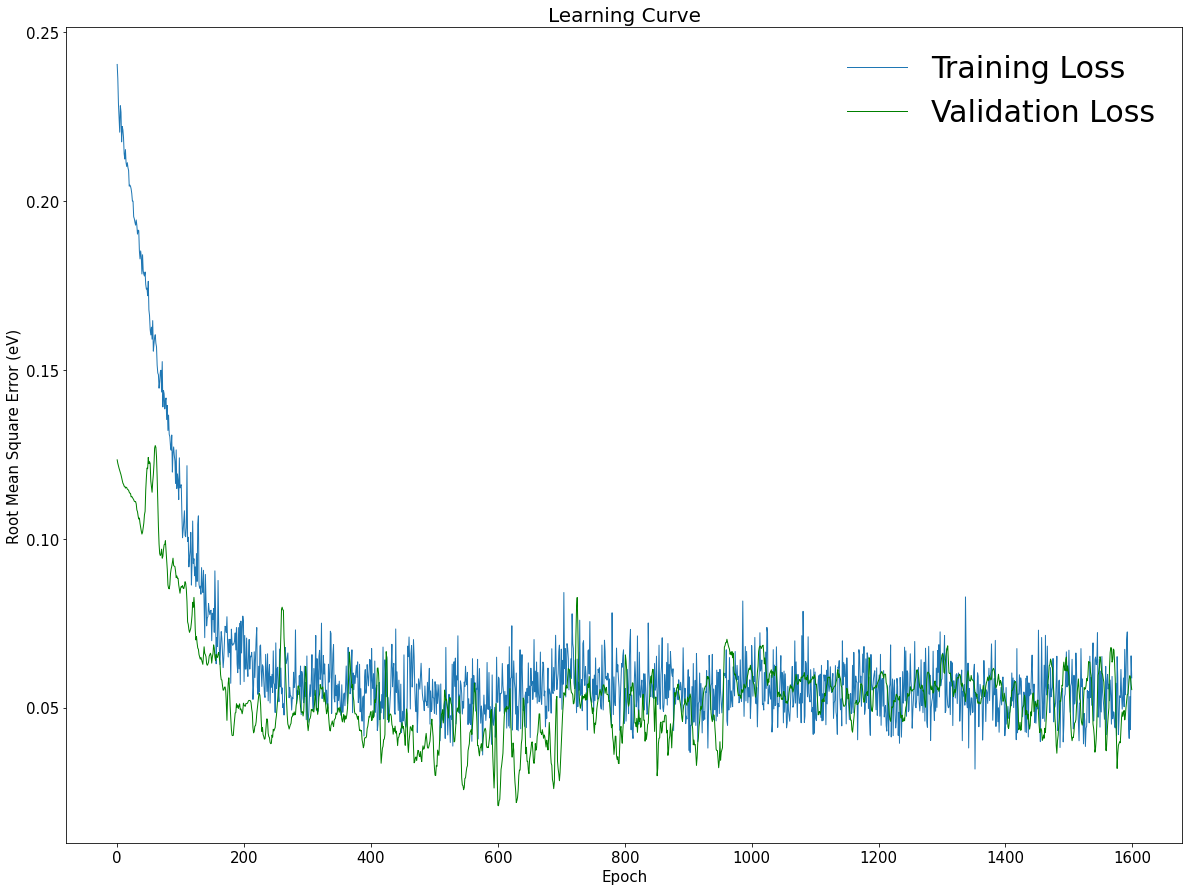

In [64]:
training_losses = model_history_rmse.history['loss']
validation_losses = model_history_rmse.history['val_loss']

plt.figure(figsize=(20, 15))
plt.plot(training_losses, label="Training Loss", linewidth = 1)
plt.plot(validation_losses, label="Validation Loss", linewidth = 1, c='g')
plt.title('Learning Curve', fontsize = 20)
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Root Mean Square Error (eV)', fontsize = 15)
plt.legend(frameon=False, fontsize = 30);

# 6. Regressor Performance Plots

In [65]:
GBR.fit(X_train, y_train)
KNR.fit(X_train, y_train)
RFR.fit(X_train, y_train)
SR.fit(X_train, y_train)
ridge.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
xgbr_optimized.fit(X_train, y_train)
light.fit(X_train, y_train)
nn = load_model('model_best_weights.h5', num_cols = len(features.columns))

In [66]:
def trendline(xd, yd, i, name, rmse, ax, order=1, c='k', alpha=1, Rval=False):
    """Make a line of best fit"""

    # Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    # Plot trendline
    if i <= 3:
        ax[0, i].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    if i > 3:
        ax[1, i - 4].plot(xl, yl, c, alpha=alpha, linestyle='--', linewidth=0.8)

    # Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        # Plot R^2 value
        if i <= 3:
            ax[0, i].text(0.25, 0.07, name, fontsize=18)
            ax[0, i].text(0.25, 0.04, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[0, i].text(0.25, 0.01, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[0, i].text(0.25, -0.02, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
        if i > 3:
            ax[1, i - 4].text(0.25, 0.07, name, fontsize=18)
            ax[1, i - 4].text(0.25, 0.04, '$MAE = %0.3f$' % mae, fontsize=18)
            ax[1, i - 4].text(0.25, 0.01, '$RMSE = %0.3f$' % rmse, fontsize=18)
            ax[1, i - 4].text(0.25, -0.02, '$R^2 = %0.3f$' % Rsqr, fontsize=18)
    else:
        # Return the R^2 value:
        return Rsqr


def plot_data(train_data, test_data, i, name, rmse, mae, ax):
    if i <= 3:
        # Plot data
        ax[0, i].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                         alpha=1, marker='o', s=25)
        ax[0, i].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                         alpha=1, marker='o', s=25)
        #ax[0,i].set_title(name, fontsize=15)

        # Combine data for best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # plot legend/axis
        ax[0, i].legend(loc='upper left', fontsize=18, frameon=False)

    if i > 3:
        # Plot data
        ax[1, i - 4].scatter(train_data['G_co (eV)'], train_data['prediction'], label="Training Set",
                             alpha=1, marker='o', s=25)
        ax[1, i - 4].scatter(test_data['G_co (eV)'], test_data['prediction'], label='Testing Set',
                             alpha=1, marker='o', s=25)
        # ax[1,i-4].set_title(name, fontsize=15)

        # Combine data to create best fit line
        x = pd.concat([train_data['G_co (eV)'], test_data['G_co (eV)']])
        y = pd.concat([train_data['prediction'], test_data['prediction']])

        # Plot best fit line
        trendline(x, y, i, name, rmse, ax)

        # Plot legend/axis
        ax[1, i - 4].legend(loc='upper left', fontsize=18, frameon=False)

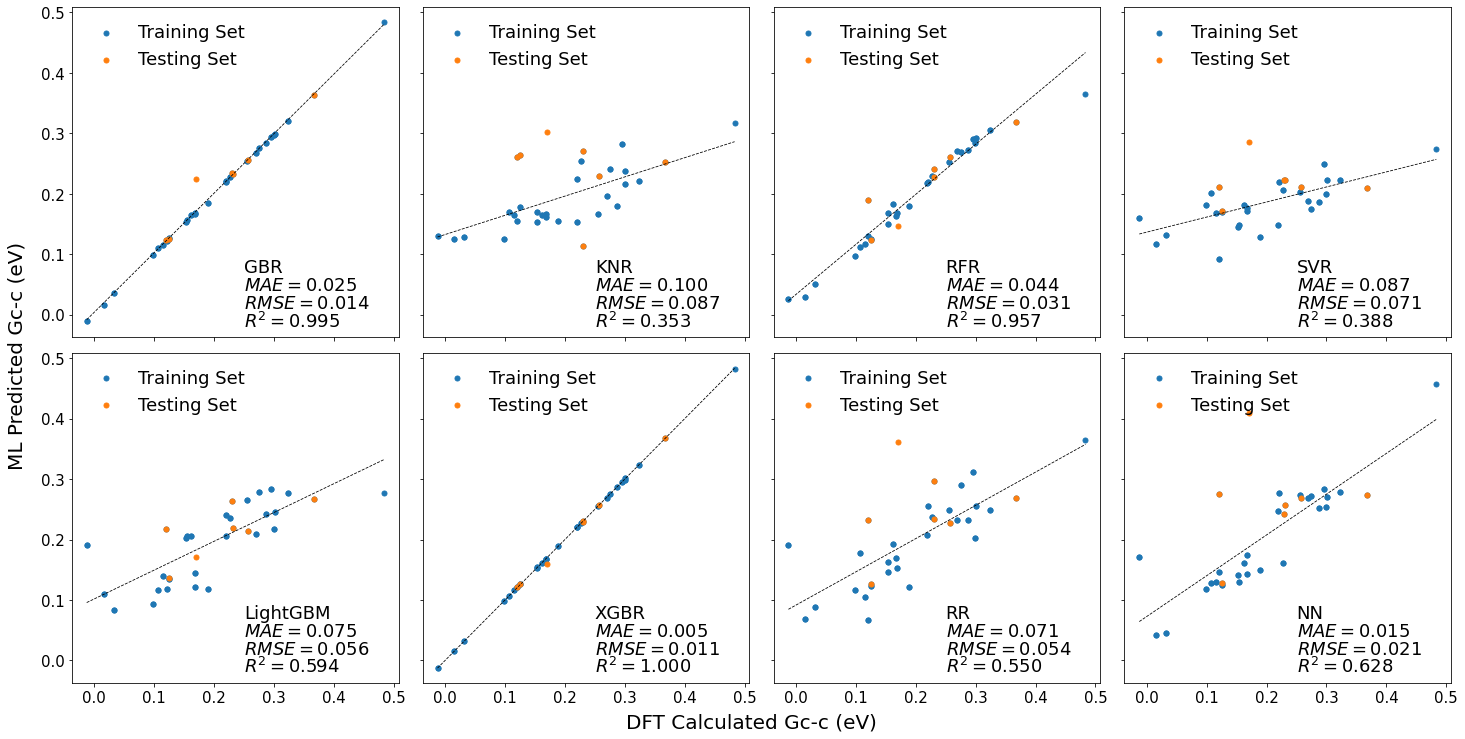

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex = True, sharey = True, figsize = (20, 10))

regressors = [GBR, KNR, RFR, SR, light, xgbr_optimized, ridge, nn]

names = {
    
    GBR: 'GBR',
    KNR: 'KNR',
    RFR: 'RFR',
    SR: 'SVR',
    light: 'LightGBM',
    xgbr_optimized: 'XGBR',
    ridge: 'RR',
    nn: 'NN'
    
}

RMSE = {
    
    GBR: results_df.iloc[-1, 0][0],
    KNR: results_df.iloc[-1, 1][0],
    RFR: results_df.iloc[-1, 2][0],
    SR: results_df.iloc[-1, 3][0],
    light: results_df.iloc[-1, 6][0],
    xgbr_optimized: optimized_xgbr_rmse,
    ridge: results_df.iloc[-1, 4][0],
    nn: nn_RMSE
    
}

MAE = {
    
    GBR: results_df.iloc[-1, 0][1],
    KNR: results_df.iloc[-1, 1][1],
    RFR: results_df.iloc[-1, 2][1],
    SR: results_df.iloc[-1, 3][1],
    light: results_df.iloc[-1, 6][1],
    xgbr_optimized: optimized_xgbr_mae,
    ridge: results_df.iloc[-1, 4][1],
    nn: nn_MAE
    
}

# Make Gco predictions on training and testing data using each regressor
for i, reg in enumerate(regressors):
    
    name = names[reg]
    rmse = RMSE[reg]
    mae = MAE[reg]
    
    
    # Predicting training data
    train_data = X_train.copy()
    train_data['G_co (eV)'] = y_train.copy()
    train_data['prediction'] = reg.predict(train_data.iloc[:, :-1])    
    
    # Predicting testing data
    test_data = X_test.copy()
    test_data['G_co (eV)'] = y_test.copy()
    test_data['prediction'] = reg.predict(test_data.iloc[:, :-1])    
    
    # Plotting the performance of each regressor
    plot_data(train_data, test_data, i, name, rmse, mae, ax)

fig.text(0.5, -0.01, 'DFT Calculated Gc-c (eV)', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'ML Predicted Gc-c (eV)', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);

# 7. XGBR Prediction on Full Dataset

In [68]:
prediction_df = pd.read_csv('CO Hydrogenation Full Data (with I).csv')

In [69]:
adsorbates = prediction_df[['Adsorbate 1', 'Adsorbate 2']]

In [70]:
prediction_df

,Adsorbate 1,Adsorbate 2,num of NM atoms 1,num of NM atoms 2,num of H 1,num of H 2,Atomic num 1,Atomic num 2,PE 1,PE 2,...,IE 1 add IE 2,Average EA of Adsorbates squared,Average PE of Adsorbates squared,Average Covalent Radius of Adosrbates squared,Average FIE of Adsorbates squared,Average VdW Radius squared,Average Atomic num of Adsorbates squared,Average num of Valence Electron squared,Average IE squared,G_CHO - Gco
0,O,O,1.0,1.0,0.0,0.0,8.0,8.0,3.44,3.44,...,27.24,2.13,11.83,0.40,185.45,2.31,64.00,36.00,185.50,0.17026
1,O,OH,1.0,2.0,0.0,1.0,8.0,4.5,3.44,2.82,...,26.64,1.65,9.80,0.31,185.31,2.07,39.06,42.25,177.42,0.29583
2,O,N,1.0,1.0,0.0,0.0,8.0,7.0,3.44,3.04,...,28.15,0.48,10.50,0.45,198.13,2.36,56.25,30.25,198.11,NaN
3,O,NH,1.0,2.0,0.0,1.0,8.0,4.0,3.44,2.62,...,26.42,0.81,9.18,0.33,191.60,2.10,36.00,36.00,174.50,NaN
4,O,NH2,1.0,3.0,0.0,2.0,8.0,3.0,3.44,2.48,...,24.40,0.94,8.76,0.29,189.45,2.01,30.25,42.25,148.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,1.0,3.0,0.0,2.0,53.0,6.0,2.66,2.33,...,20.91,4.53,6.22,0.89,131.90,2.86,870.25,56.25,109.31,NaN
285,I,F,1.0,1.0,0.0,0.0,53.0,9.0,2.66,3.98,...,27.87,10.43,11.02,0.97,194.23,2.98,961.00,49.00,194.18,NaN
286,I,Cl,1.0,1.0,0.0,0.0,53.0,17.0,2.66,3.16,...,23.42,11.13,8.47,1.35,137.10,3.48,1225.00,49.00,137.12,NaN
287,I,Br,1.0,1.0,0.0,0.0,53.0,35.0,2.66,2.96,...,22.26,10.31,7.90,1.53,123.93,3.67,1936.00,49.00,123.88,NaN


In [71]:
# Savings the Gco column
targets = prediction_df['G_CHO - Gco']

In [72]:
diff = prediction_df.columns.difference(test_data.columns)

In [73]:
# Removing all columns that were deleted in feature selection to maintain the same prediction features as training
prediction_df = prediction_df.drop(prediction_df.columns.difference(test_data.columns), 1)

In [74]:
prediction_df.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average IE', 'Average EA',
       'Average num of Valence Electron', 'PE 1 minus PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'FIE 1 minus FIE 2',
       'EA 1 minus EA 2', 'num of Valence 1 minus num of Valence 2',
       'IE 1 minus IE 2'],
      dtype='object')

In [75]:
df_v5.columns

Index(['num of Atoms', 'Average Atomic num', 'Average PE',
       'Average Covalent Radius', 'Average IE', 'Average EA',
       'Average num of Valence Electron', 'PE 1 minus PE 2',
       'Covalent Radius 1 minus Covalent Radius 2',
       'VdW Radius 1 minus VdW Radius 2', 'FIE 1 minus FIE 2',
       'EA 1 minus EA 2', 'num of Valence 1 minus num of Valence 2',
       'IE 1 minus IE 2', 'G_CHO - Gco'],
      dtype='object')

In [76]:
def scaler(df):
    
    base = pd.read_csv('CO Hydrogenation Full Data (with I).csv')
    base = base.drop(columns = ['Adsorbate 1', 'Adsorbate 2', 'G_CHO - Gco'])
    scales = {}
    for i in range(len(base.columns)):
        name = base.columns[i]
        minimum = min(base.iloc[:, i])
        maximum = max(base.iloc[:, i])
        scales[name] = [minimum, maximum]
    
    for i in range(len(df.columns)):
        name_1 = df.columns[i]
        if name_1 == 'G_CHO - Gco':
            pass
        else:
            for j, row in enumerate(df[name_1]):
                df.iloc[j, i] = (row - scales[name_1][0]) / (scales[name_1][1] - scales[name_1][0])
        
    return df


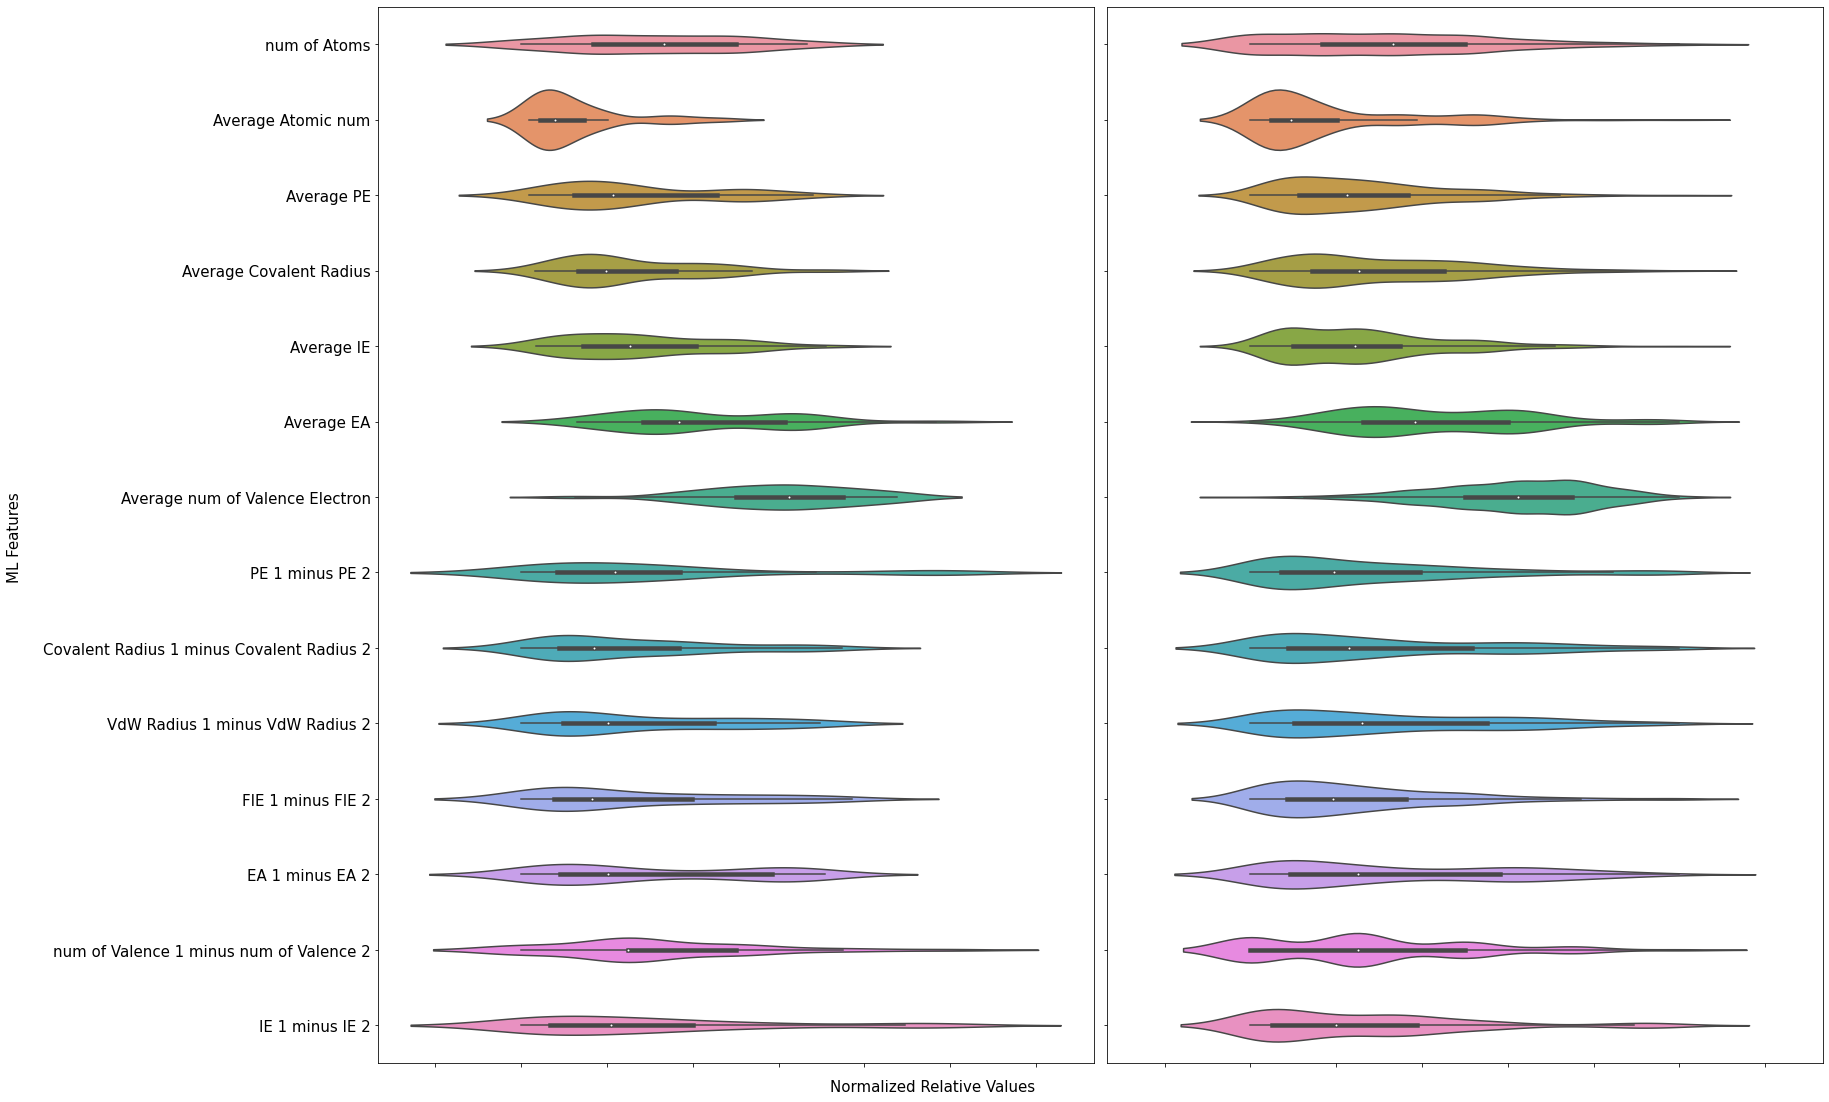

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

training_df = scaler(df_v5.copy())
training_df = training_df.iloc[:, :-1].melt(var_name='Features', value_name='Values')

full_df = scaler(prediction_df.copy())
full_df = full_df.melt(var_name='Features', value_name='Values')

sns.violinplot(x = 'Values', y = 'Features', data = training_df, ax=ax[0]).set(xticklabels=[])
sns.violinplot(x = 'Values', y = 'Features', data = full_df, ax=ax[1]).set(xticklabels=[])

ax[0].set_ylabel('')    
ax[0].set_xlabel('')
ax[1].set_ylabel('')    
ax[1].set_xlabel('')

fig.text(0.5, -0.01, 'Normalized Relative Values', ha='center', va='center', fontsize = 15)
fig.text(-0.01, 0.5, 'ML Features', ha='center', va='center', rotation='vertical', fontsize = 15)
fig.tight_layout(pad = 1);

In [78]:
'''fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))

x = list(prediction_df.columns)

training_df = scaler(df_v5.copy())
full_df = scaler(prediction_df.copy())

ax1.violinplot(training_df.iloc[:, :-1].T, vert=False)
ax2.violinplot(full_df.T, vert=False)

for ax in [ax1, ax2]:
    set_axis_style(ax, x)

fig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)
fig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.tight_layout(pad = 1);'''

"fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, sharex = True, figsize = (25, 15))\n\nx = list(prediction_df.columns)\n\ntraining_df = scaler(df_v5.copy())\nfull_df = scaler(prediction_df.copy())\n\nax1.violinplot(training_df.iloc[:, :-1].T, vert=False)\nax2.violinplot(full_df.T, vert=False)\n\nfor ax in [ax1, ax2]:\n    set_axis_style(ax, x)\n\nfig.text(0.5, -0.01, 'ML Features', ha='center', va='center', fontsize = 20)\nfig.text(-0.01, 0.5, 'Relative Values', ha='center', va='center', rotation='vertical', fontsize = 20)\nfig.tight_layout(pad = 1);"

In [79]:
# Adding the Gco column back
prediction_df['G_CHO - Gco'] = targets

In [80]:
def ml_predict(dataframe, name, reg):
    dataframe['Ghyd_ML'] = np.nan
    for i, col in enumerate(dataframe['Ghyd_ML']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-2]).T)

    dataframe['Ghyd_Final'] = dataframe[name]
    for i, col in enumerate(dataframe['Ghyd_Final']):
        if pd.isnull(col):
            dataframe.iloc[i, -1] = reg.predict(pd.DataFrame(dataframe.iloc[i, 0:-3]).T)

In [81]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average IE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_CHO - Gco
0,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.17026
1,1.5,6.25,3.13,0.56,13.32,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,0.60,0.29583
2,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,0.91,NaN
3,1.5,6.00,3.03,0.58,13.21,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,0.82,NaN
4,2.0,5.50,2.96,0.54,12.20,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,10.46,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,0.01,NaN
285,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,6.97,NaN
286,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,2.52,NaN
287,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,1.36,NaN


In [82]:
ml_predict(prediction_df, 'G_CHO - Gco' ,xgbr_optimized)

In [83]:
prediction_df

,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average IE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_CHO - Gco,Ghyd_ML,Ghyd_Final
0,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.17026,0.158934,0.170260
1,1.5,6.25,3.13,0.56,13.32,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,0.60,0.29583,0.295765,0.295830
2,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,0.91,NaN,0.174600,0.174600
3,1.5,6.00,3.03,0.58,13.21,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,0.82,NaN,0.168453,0.168453
4,2.0,5.50,2.96,0.54,12.20,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.84,NaN,0.291183,0.291183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2.0,29.50,2.49,0.95,10.46,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,0.01,NaN,0.123524,0.123524
285,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,6.97,NaN,0.238309,0.238309
286,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,2.52,NaN,0.273732,0.273732
287,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,1.36,NaN,0.277020,0.277020


In [84]:
b = np.sqrt(((prediction_df['G_CHO - Gco'] - prediction_df['Ghyd_ML'])**2).mean()).round(4)

In [85]:
print('Training RMSE: {}'.format(optimized_xgbr_rmse.round(4)))
print('Testing RMSE: {}'.format(b))

Training RMSE: 0.0106
Testing RMSE: 0.0015


In [86]:
prediction_df['Ghyd_Final'].describe()

count    289.000000
mean       0.201075
std        0.093842
min       -0.018034
25%        0.143770
50%        0.192079
75%        0.253989
max        0.525358
Name: Ghyd_Final, dtype: float64

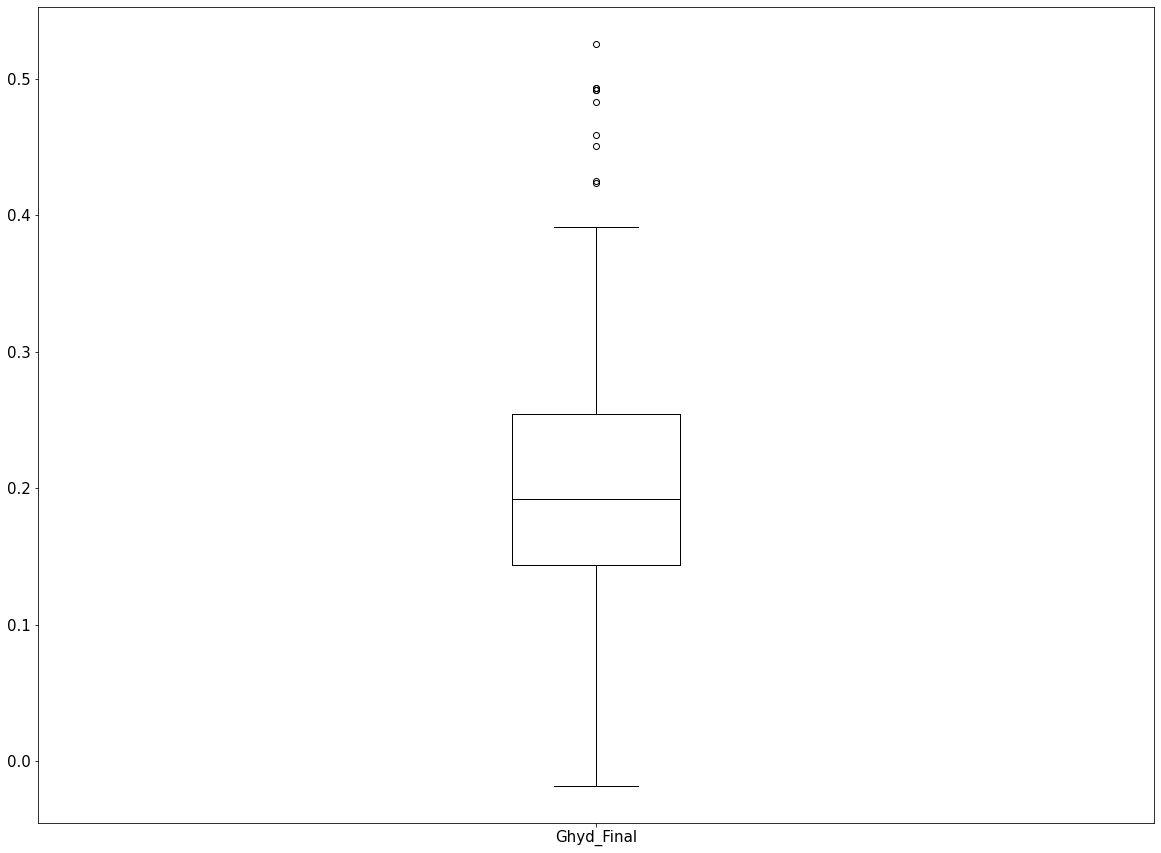

In [87]:
prediction_df.boxplot(color=dict(boxes='black', whiskers='black', medians='black', caps='black'), 
                      column='Ghyd_Final', grid=False, figsize=(20, 15));

In [88]:
final = adsorbates.join(prediction_df, how = 'left')

In [89]:
final

,Adsorbate 1,Adsorbate 2,num of Atoms,Average Atomic num,Average PE,Average Covalent Radius,Average IE,Average EA,Average num of Valence Electron,PE 1 minus PE 2,Covalent Radius 1 minus Covalent Radius 2,VdW Radius 1 minus VdW Radius 2,FIE 1 minus FIE 2,EA 1 minus EA 2,num of Valence 1 minus num of Valence 2,IE 1 minus IE 2,G_CHO - Gco,Ghyd_ML,Ghyd_Final
0,O,O,1.0,8.00,3.44,0.63,13.62,1.46,6.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.17026,0.158934,0.170260
1,O,OH,1.5,6.25,3.13,0.56,13.32,1.28,6.5,0.62,0.15,0.16,0.01,0.35,1.0,0.60,0.29583,0.295765,0.295830
2,O,N,1.0,7.50,3.24,0.67,14.08,0.70,5.5,0.40,0.08,0.03,0.92,1.53,1.0,0.91,NaN,0.174600,0.174600
3,O,NH,1.5,6.00,3.03,0.58,13.21,0.90,6.0,0.82,0.11,0.15,0.45,1.12,0.0,0.82,NaN,0.168453,0.168453
4,O,NH2,2.0,5.50,2.96,0.54,12.20,0.97,6.5,0.96,0.18,0.20,0.29,0.98,1.0,2.84,NaN,0.291183,0.291183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,I,SH2,2.0,29.50,2.49,0.95,10.46,2.13,7.5,0.33,0.77,0.58,2.07,1.86,1.0,0.01,NaN,0.123524,0.123524
285,I,F,1.0,31.00,3.32,0.99,13.94,3.23,7.0,1.32,0.69,0.51,6.97,0.34,0.0,6.97,NaN,0.238309,0.238309
286,I,Cl,1.0,35.00,2.91,1.16,11.71,3.34,7.0,0.50,0.34,0.23,2.52,0.55,0.0,2.52,NaN,0.273732,0.273732
287,I,Br,1.0,44.00,2.81,1.24,11.13,3.21,7.0,0.30,0.19,0.13,1.36,0.30,0.0,1.36,NaN,0.277020,0.277020


In [90]:
# Save the predicted dataframe
final.to_csv('predicted_Ghyd_xgbr.csv')

# 8. delta_Gco Heat Map

In [91]:
adsorbates = final['Adsorbate 1'].unique()
binding_energy = final['Ghyd_Final']

In [92]:
binding_energy

0      0.170260
1      0.295830
2      0.174600
3      0.168453
4      0.291183
         ...   
284    0.123524
285    0.238309
286    0.273732
287    0.277020
288    0.425462
Name: Ghyd_Final, Length: 289, dtype: float64

In [93]:
def transform_2D(series):
    result = []
    temp = []
    count = 1
    for i in series:
        if count % 18 != 0:
            temp.append(i)
            count += 1
        else:
            count = 1
            result.append(temp)
            temp = []
            temp.append(i)
            count += 1
    result.append(temp)
    return result

In [94]:
# Transform series into a 2D array
twoD = transform_2D(binding_energy)

In [95]:
twoD

[[0.17026,
  0.29583000000000004,
  0.17460013926029205,
  0.16845275461673737,
  0.29118308424949646,
  0.2986568808555603,
  0.1419634371995926,
  0.14559133350849152,
  0.20671992003917694,
  0.30524560809135437,
  0.09162384271621704,
  0.2064312845468521,
  0.27154913544654846,
  0.22531041502952576,
  0.30107,
  0.25255903601646423,
  0.19783896207809448],
 [0.29583000000000004,
  0.48339,
  0.14376966655254364,
  0.251184344291687,
  0.1483260989189148,
  0.12011,
  0.15317,
  0.16787,
  0.21572726964950562,
  0.1323736310005188,
  0.19907431304454803,
  0.27230191230773926,
  0.32325,
  0.23116,
  0.2272392362356186,
  0.19228549301624298,
  0.22289524972438812],
 [0.17460013926029205,
  0.14376966655254364,
  0.1358456313610077,
  0.13744299113750458,
  0.13214173913002014,
  0.24488835036754608,
  0.09894,
  0.14875027537345886,
  0.13838787376880646,
  0.12575999999999998,
  0.03232,
  0.09767913073301315,
  0.2538241744041443,
  0.1693248599767685,
  0.14548496901988983,
  

In [96]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from matplotlib.colors import ListedColormap




#Plotting
trace = go.Heatmap(z = twoD,
                   x = adsorbates,
                   y = adsorbates,
                   colorscale = 'YlOrBr',
                   colorbar   = dict(title = "Delta_Ghyd",
                                     titleside = "right"
                                    )
                  )

layout = go.Layout(dict(title = "Gc-c for different adsorbate combinations",
                        autosize = False,
                        height  = 1000,
                        width   = 1000,
                        yaxis   = dict(tickfont = dict(size = 15)),
                        xaxis   = dict(tickfont = dict(size = 15))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

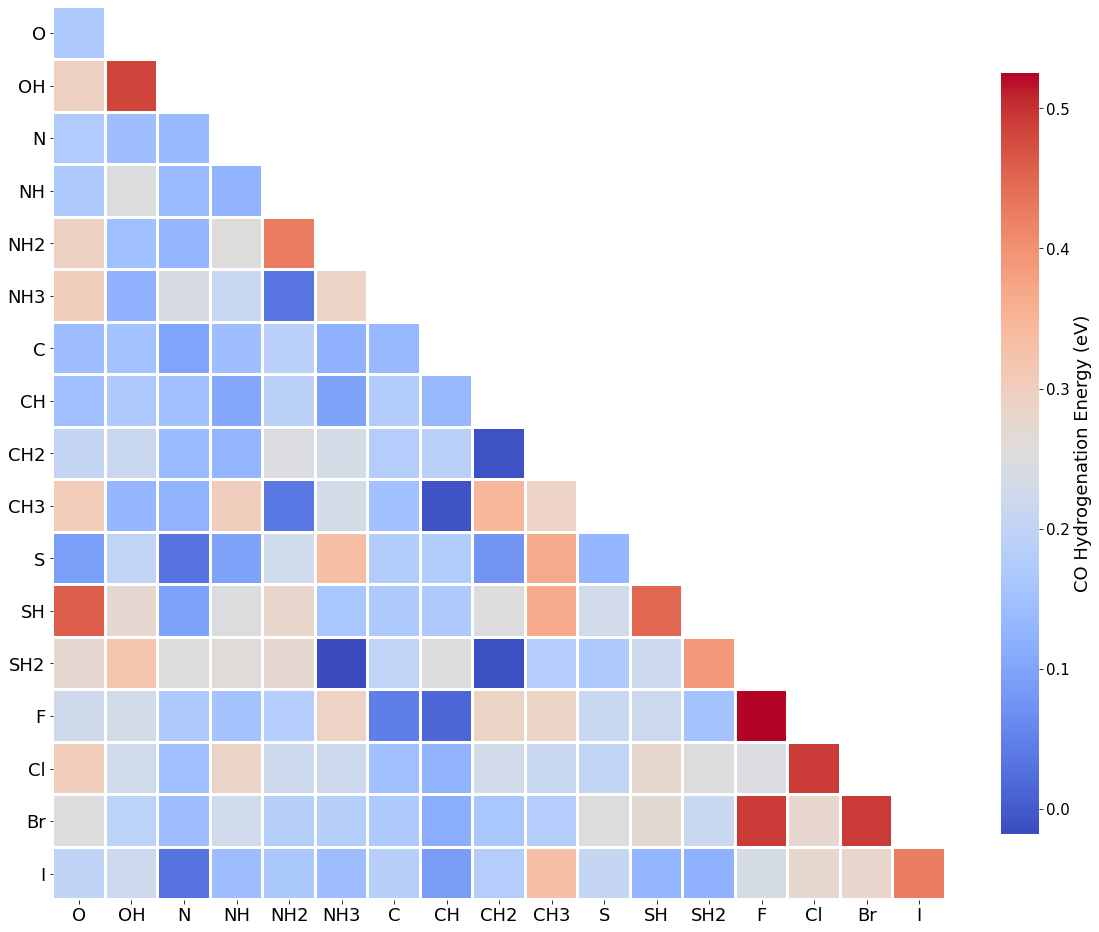

In [97]:
import matplotlib

cmap1 = matplotlib.colors.ListedColormap(['g'])
mask = np.tril(np.ones_like(twoD, dtype=bool))

ax = sns.heatmap(twoD, linewidth=2, mask = 1 - mask,
                 cmap = "coolwarm", square = True, cbar_kws={'label': 'CO Hydrogenation Energy (eV)', 'shrink': 0.7})
ax.figure.axes[-1].yaxis.label.set_size(18)

#ax = sns.heatmap(twoD, linewidth=2, mask = np.array(twoD) < 0.3, cmap = cmap1, square = True, cbar=False)

ax.set_xticklabels(adsorbates, rotation = 0, size = 18)
ax.set_yticklabels(adsorbates, rotation = 0, size = 18)

plt.show()